# Rough verification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cm
import warnings
warnings.filterwarnings("ignore")
import xgcm

import os
from pathlib import Path
from dask.distributed import Client

client = Client()
client

<Client: 'tcp://127.0.0.1:35873' processes=7 threads=14, memory=63.00 GiB>

In [25]:
thetao3d = xr.open_dataset('/scratch/x77/cy8964/access-om3/archive/25km_jra_ryf-obc/output000/access-om3.mom6.3d.thetao.1mon.mean.1900.nc')

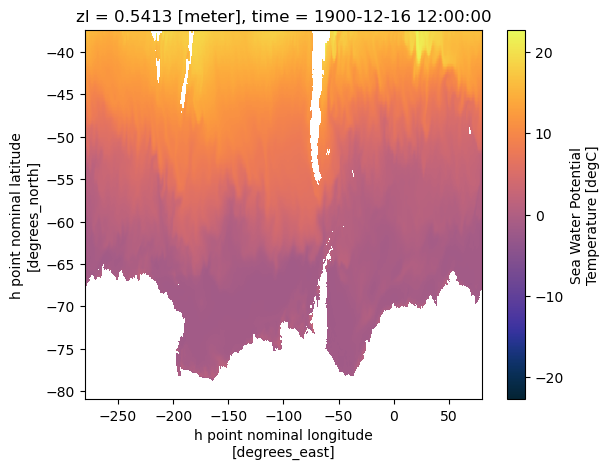

In [26]:
thetao3d.thetao.isel(time = -1).isel(zl = 0).plot(cmap = cm.cm.thermal)

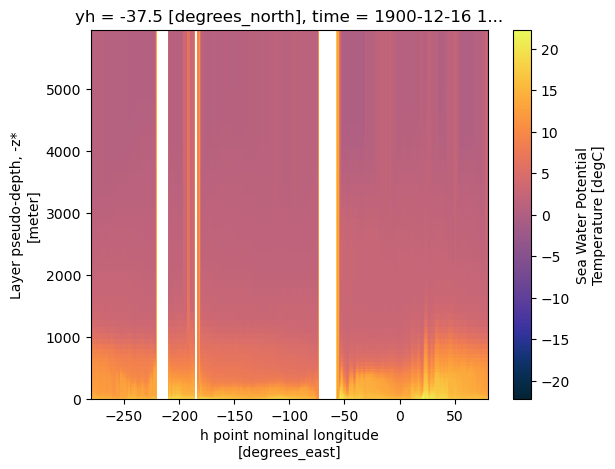

In [18]:
thetao3d.thetao.isel(time = -1).isel(yh = -1).plot(cmap = cm.cm.thermal)

In [3]:
scalar = xr.open_dataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output000/access-om3.mom6.scalar.1day.snap.1900.nc')
scalar

<xarray.Dataset> Size: 5kB
Dimensions:                                (scalar_axis: 1, time: 31)
Coordinates:
  * scalar_axis                            (scalar_axis) float64 8B 0.0
  * time                                   (time) object 248B 1900-01-02 00:0...
Data variables: (12/19)
    soga                                   (time, scalar_axis) float64 248B ...
    thetaoga                               (time, scalar_axis) float64 248B ...
    tosga                                  (time, scalar_axis) float64 248B ...
    sosga                                  (time, scalar_axis) float64 248B ...
    total_salt_Flux_Added                  (time, scalar_axis) float64 248B ...
    total_salt_Flux_In                     (time, scalar_axis) float64 248B ...
    ...                                     ...
    total_prsn                             (time, scalar_axis) float64 248B ...
    total_lprec                            (time, scalar_axis) float64 248B ...
    total_ficeberg                         (time, scalar_axis) float64 248B ...
    total_friver                           (time, scalar_axis) float64 248B ...
    total_net_massout                      (time, scalar_axis) float64 248B ...
    total_net_massin                       (time, scalar_axis) float64 248B ...
Attributes:
    title:      ACCESS-OM3
    grid_type:  regular
    grid_tile:  N/A

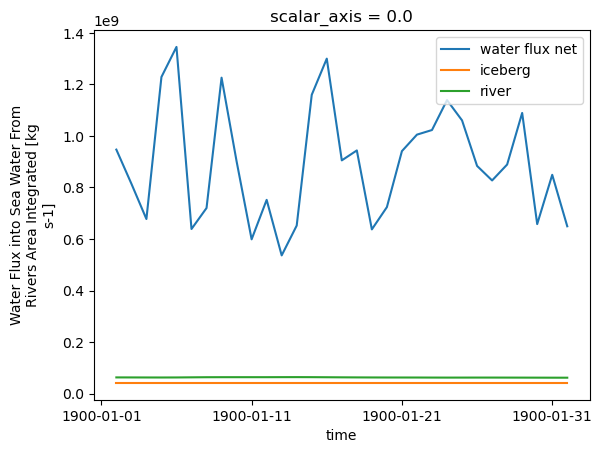

In [4]:
scalar.total_wfo.plot(label = 'water flux net')
scalar.total_ficeberg.plot(label = 'iceberg')
scalar.total_friver.plot(label = 'river')
plt.legend()

copy from Andrew's script: https://github.com/aekiss/access-eval-recipes/blob/ef120fa/ocean/runoff_budget.ipynb

issue: https://github.com/ACCESS-NRI/access-om3-configs/issues/410

In [5]:
jra55dopaths = {
    'areacello': '/g/data/qv56/replicas/input4MIPs/CMIP6/OMIP/MRI/MRI-JRA55-do-1-4-0/ocean/fx/areacello/gr/v20190429/areacello_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr.nc',
    'friver': '/g/data/vk83/configurations/inputs/JRA-55/RYF/v1-4/data/RYF.friver.1990_1991.nc',
    'licalvf': '/g/data/vk83/configurations/inputs/JRA-55/RYF/v1-4/data/RYF.licalvf.1990_1991.nc'
}

In [6]:
jra55do = xr.open_mfdataset([ v for v in jra55dopaths.values() ])


In [7]:
jra55doGrid = xgcm.Grid(jra55do,
                        periodic=['X'],
                        metrics = { ('X', 'Y'): ['areacello']})


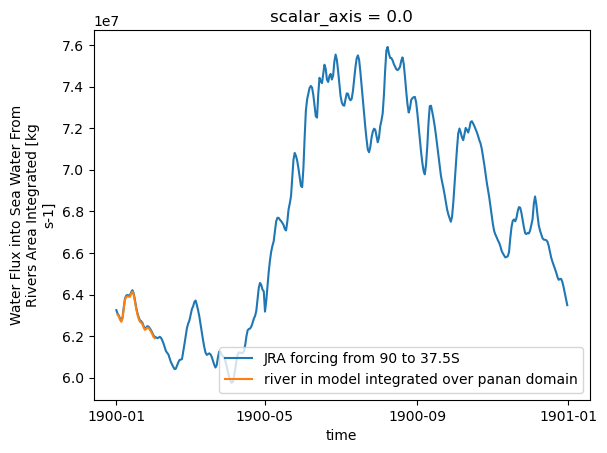

In [13]:
jra55doGrid.integrate(jra55do.friver.sel(lat = slice(-90,-37.5)), ['X', 'Y']).plot(label = 'JRA forcing from 90 to 37.5S')
scalar.total_friver.plot(label = 'river in model integrated over panan domain')
plt.legend()

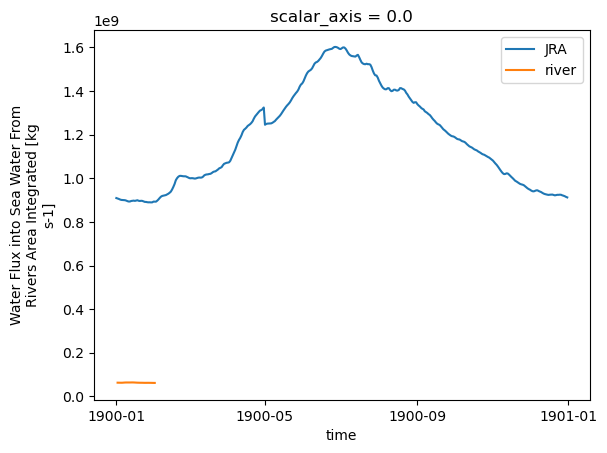

In [10]:
jra55doGrid.integrate(jra55do.friver, ['X', 'Y']).plot(label = 'JRA')
scalar.total_friver.plot(label = 'river')
plt.legend()

# For including ice shelf cavities - maybe need to set JRA55do friver file to zero below a certain latitude.

Also, check that 8km grid will work with Anton's runoff regridding

# panan 8k new parameter spinup

In [3]:
work_dir = '/scratch/x77/cy8964/access-om3/work/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams/'

In [4]:
!ls $work_dir

access-om3.cice.1day.mean.1900-01-01.nc
access-om3.cice.1day.mean.1900-01-02.nc
access-om3.cice.1day.mean.1900-01-03.nc
access-om3.cice.1day.mean.1900-01-04.nc
access-om3.cice.1day.mean.1900-01-05.nc
access-om3.cice.1day.mean.1900-01-06.nc
access-om3.cice.1day.mean.1900-01-07.nc
access-om3.cice.1day.mean.1900-01-08.nc
access-om3.cice.1day.mean.1900-01-09.nc
access-om3.cice.1day.mean.1900-01-10.nc
access-om3.cice.1day.mean.1900-01-11.nc
access-om3.cice.1day.mean.1900-01-12.nc
access-om3.cice.1day.mean.1900-01-13.nc
access-om3.cice.1day.mean.1900-01-14.nc
access-om3.cice.1day.mean.1900-01-15.nc
access-om3.cice.1day.mean.1900-01-16.nc
access-om3.cice.1day.mean.1900-01-17.nc
access-om3.cice.1day.mean.1900-01-18.nc
access-om3.cice.1day.mean.1900-01-19.nc
access-om3.cice.1day.mean.1900-01-20.nc
access-om3.cice.1day.mean.1900-01-21.nc
access-om3.cice.1day.mean.1900-01-22.nc
access-om3.cice.1day.mean.1900-01-23.nc
access-om3.cice.1day.mean.1900-01-24.nc
access-om3.cice.1day.mean.1900-01-25.nc


In [20]:
#sst_daily = xr.open_mfdataset(work_dir+'access-om3.mom6.2d.tos.1day.mean._1900.nc')
#temp = xr.open_mfdataset(work_dir+'access-om3.mom6.3d.thetao.1mon.mean._1900.nc')
#salt = xr.open_mfdataset(work_dir+'access-om3.mom6.3d.so.1mon.mean._1900.nc')
#OBC_in = xr.open_mfdataset('/g/data/x77/cy8964/mom6/input/input-8km/forcing_access_yr2_8km_fill.nc')
#OBC_in_25k = xr.open_mfdataset('/g/data/x77/cy8964/mom6/input/input-25km/forcing_access_yr2_25km_fill.nc')
#ACCESS_OM2 = xr.open_mfdataset('/g/data/x77/akm157/model_output/mom5/01deg_jra55v13_ryf9091/regional_boundary_forcing/output008/ocean/ocean.nc')
#panan01 = xr.open_mfdataset('/g/data/ol01/outputs/mom6-panan/panant-01-zstar-ACCESSyr2/output000/19910101.ocean_month_z.nc')
panan005 = xr.open_mfdataset('/g/data/ol01/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/output000/19910101.ocean_month_z.nc')
#OBC_in_panan005 = xr.open_mfdataset('/g/data/g40/akm157/inputs/mom6/panan/panan_005/forcing_access_yr2_005.nc')
#h = xr.open_mfdataset(work_dir+'access-om3.mom6.3d.thkcello.1mon.mean._1900.nc')
#ocean_geometry = xr.open_mfdataset(work_dir+'ocean_geometry.nc')

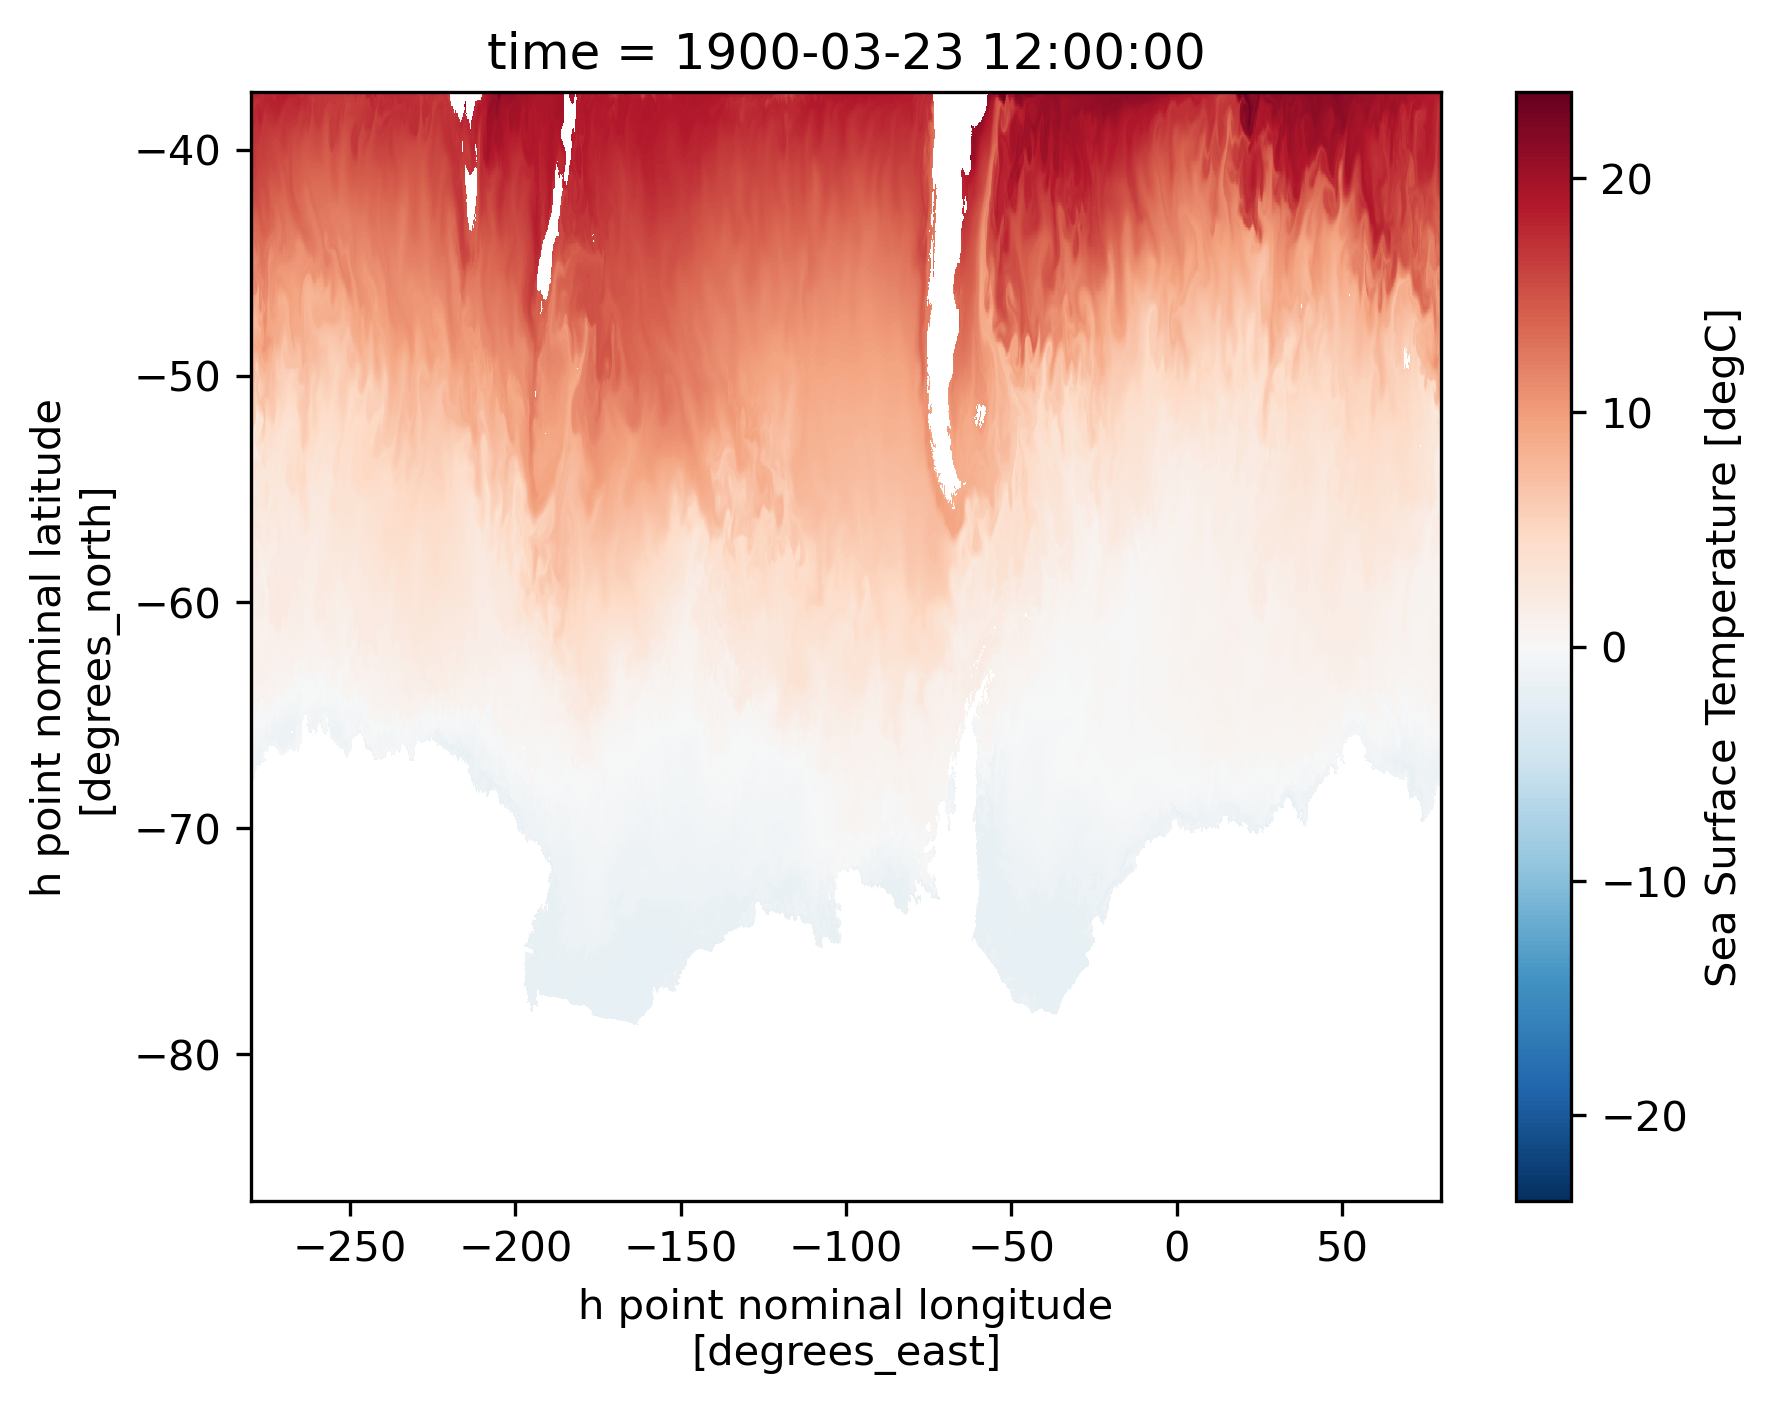

In [11]:
fig, axes = plt.subplots(dpi = 300)

sst_daily.tos.isel(time = -1).plot()

# Salt and temp transects at northern boundary

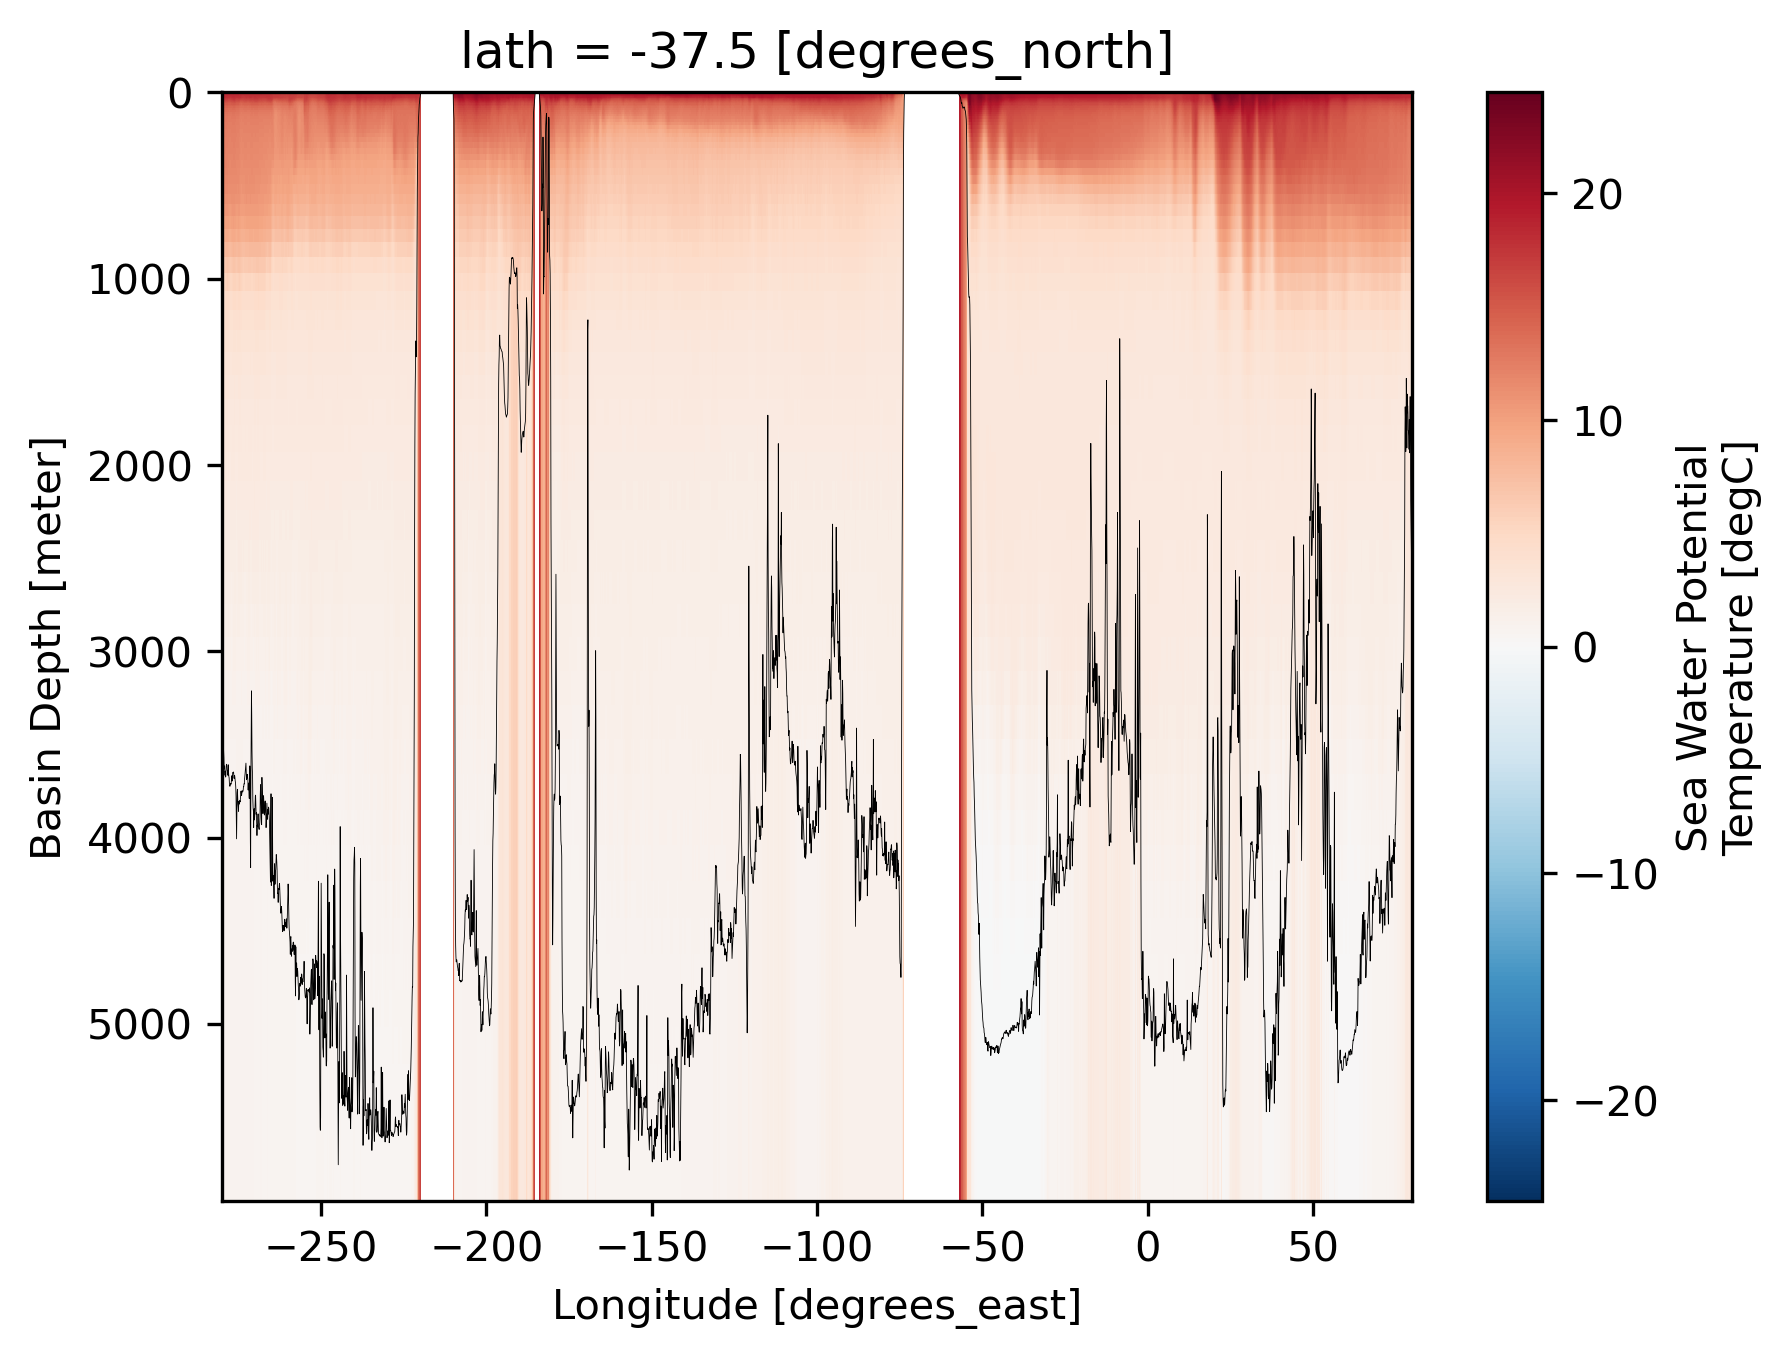

In [13]:
fig, axes = plt.subplots(dpi = 300)

temp.thetao.isel(time = -1, yh = -1).plot(yincrease = False)
ocean_geometry.D.isel(lath = -1).plot(linewidth = 0.2,color = 'k')

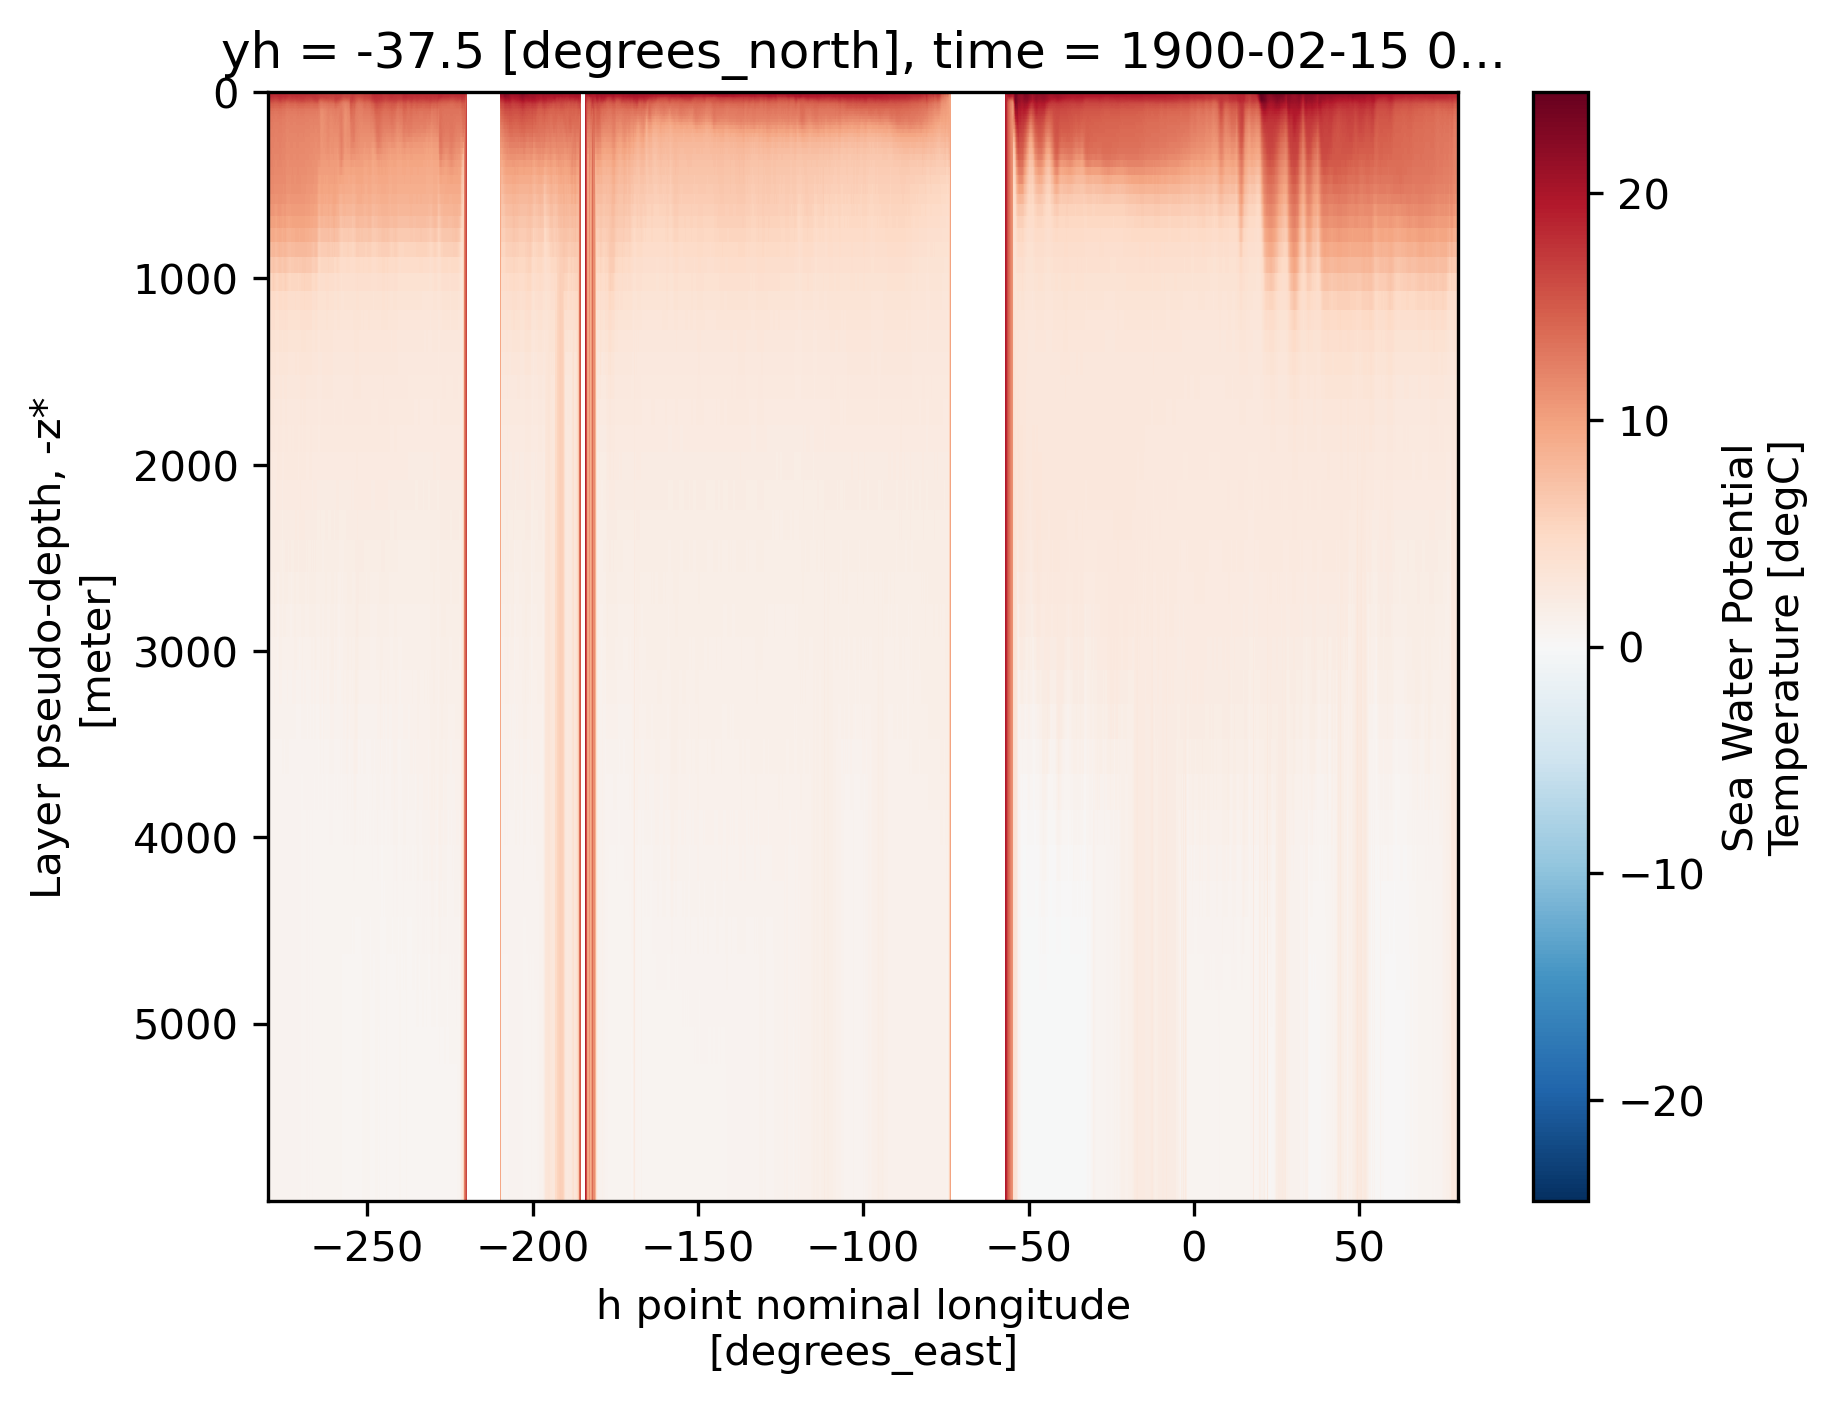

In [18]:
fig, axes = plt.subplots(dpi = 300)

temp.thetao.isel(time = -1, yh = -1).plot(yincrease = False)

In [8]:
temp

<xarray.Dataset> Size: 4GB
Dimensions:     (xh: 4320, yh: 1442, zl: 75, time: 2, nv: 2)
Coordinates:
  * xh          (xh) float64 35kB -280.0 -279.9 -279.8 ... 79.79 79.88 79.96
  * yh          (yh) float64 12kB -86.49 -86.47 -86.45 ... -37.63 -37.56 -37.5
  * zl          (zl) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.805e+03
  * time        (time) object 16B 1900-01-16 12:00:00 1900-02-15 00:00:00
  * nv          (nv) float64 16B 1.0 2.0
Data variables:
    thetao      (time, zl, yh, xh) float32 4GB dask.array<chunksize=(1, 15, 289, 864), meta=np.ndarray>
    average_T1  (time) datetime64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] 16B dask.array<chunksize=(2,), meta=np.ndarray>
    time_bnds   (time, nv) object 32B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    NumFilesInSet:     1
    title:             ACCESS-OM3
    associated_files:  areacello: access-om3.mom6.static.nc
    grid_type:         regular
    grid_tile:         N/A

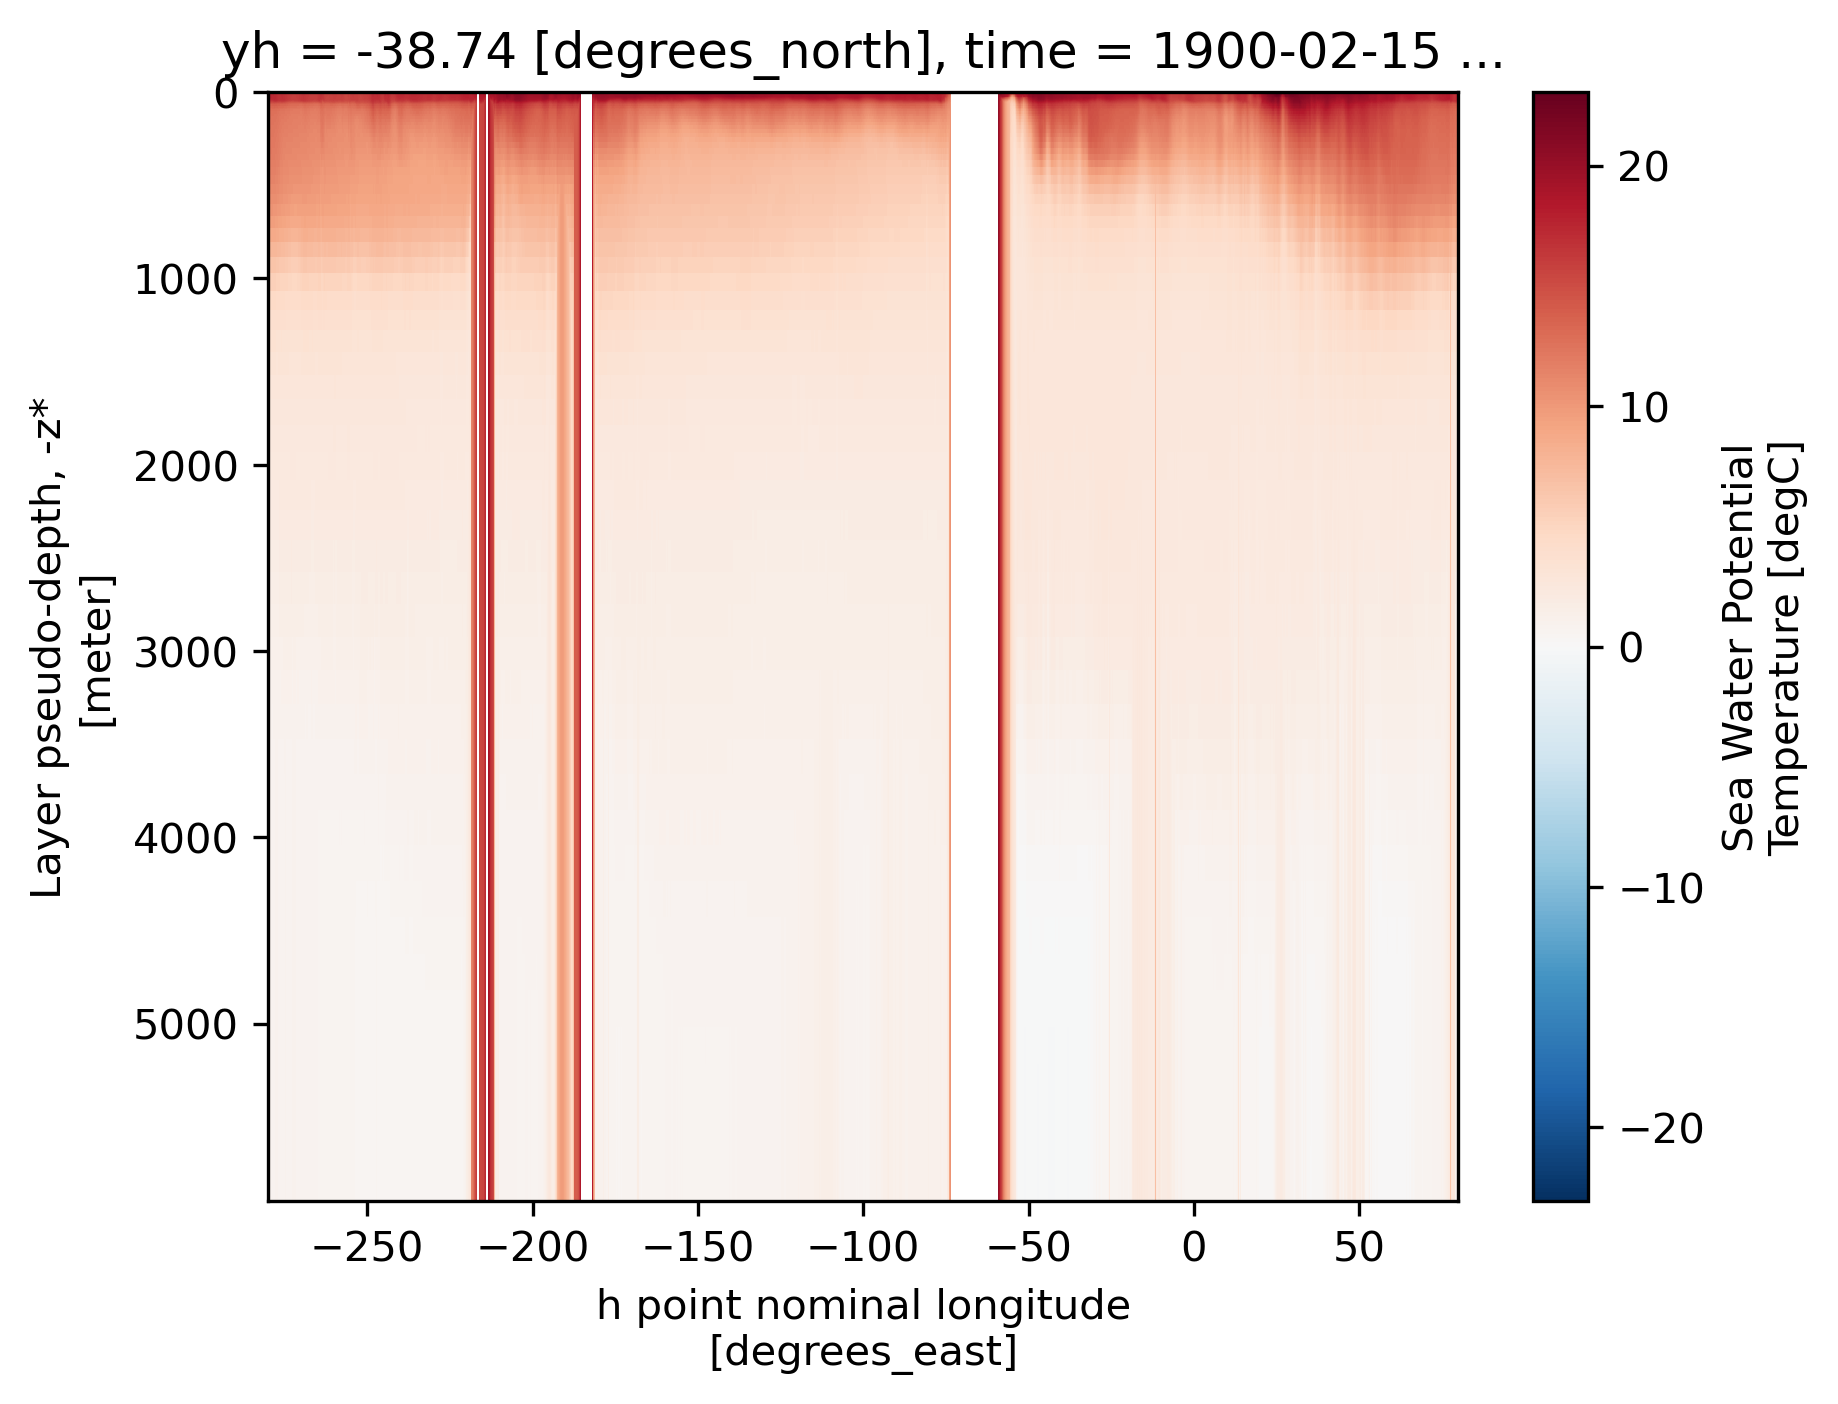

In [43]:
fig, axes = plt.subplots(dpi = 300)

temp.thetao.isel(time = -1, yh = -20).plot(yincrease = False)
plt.show()

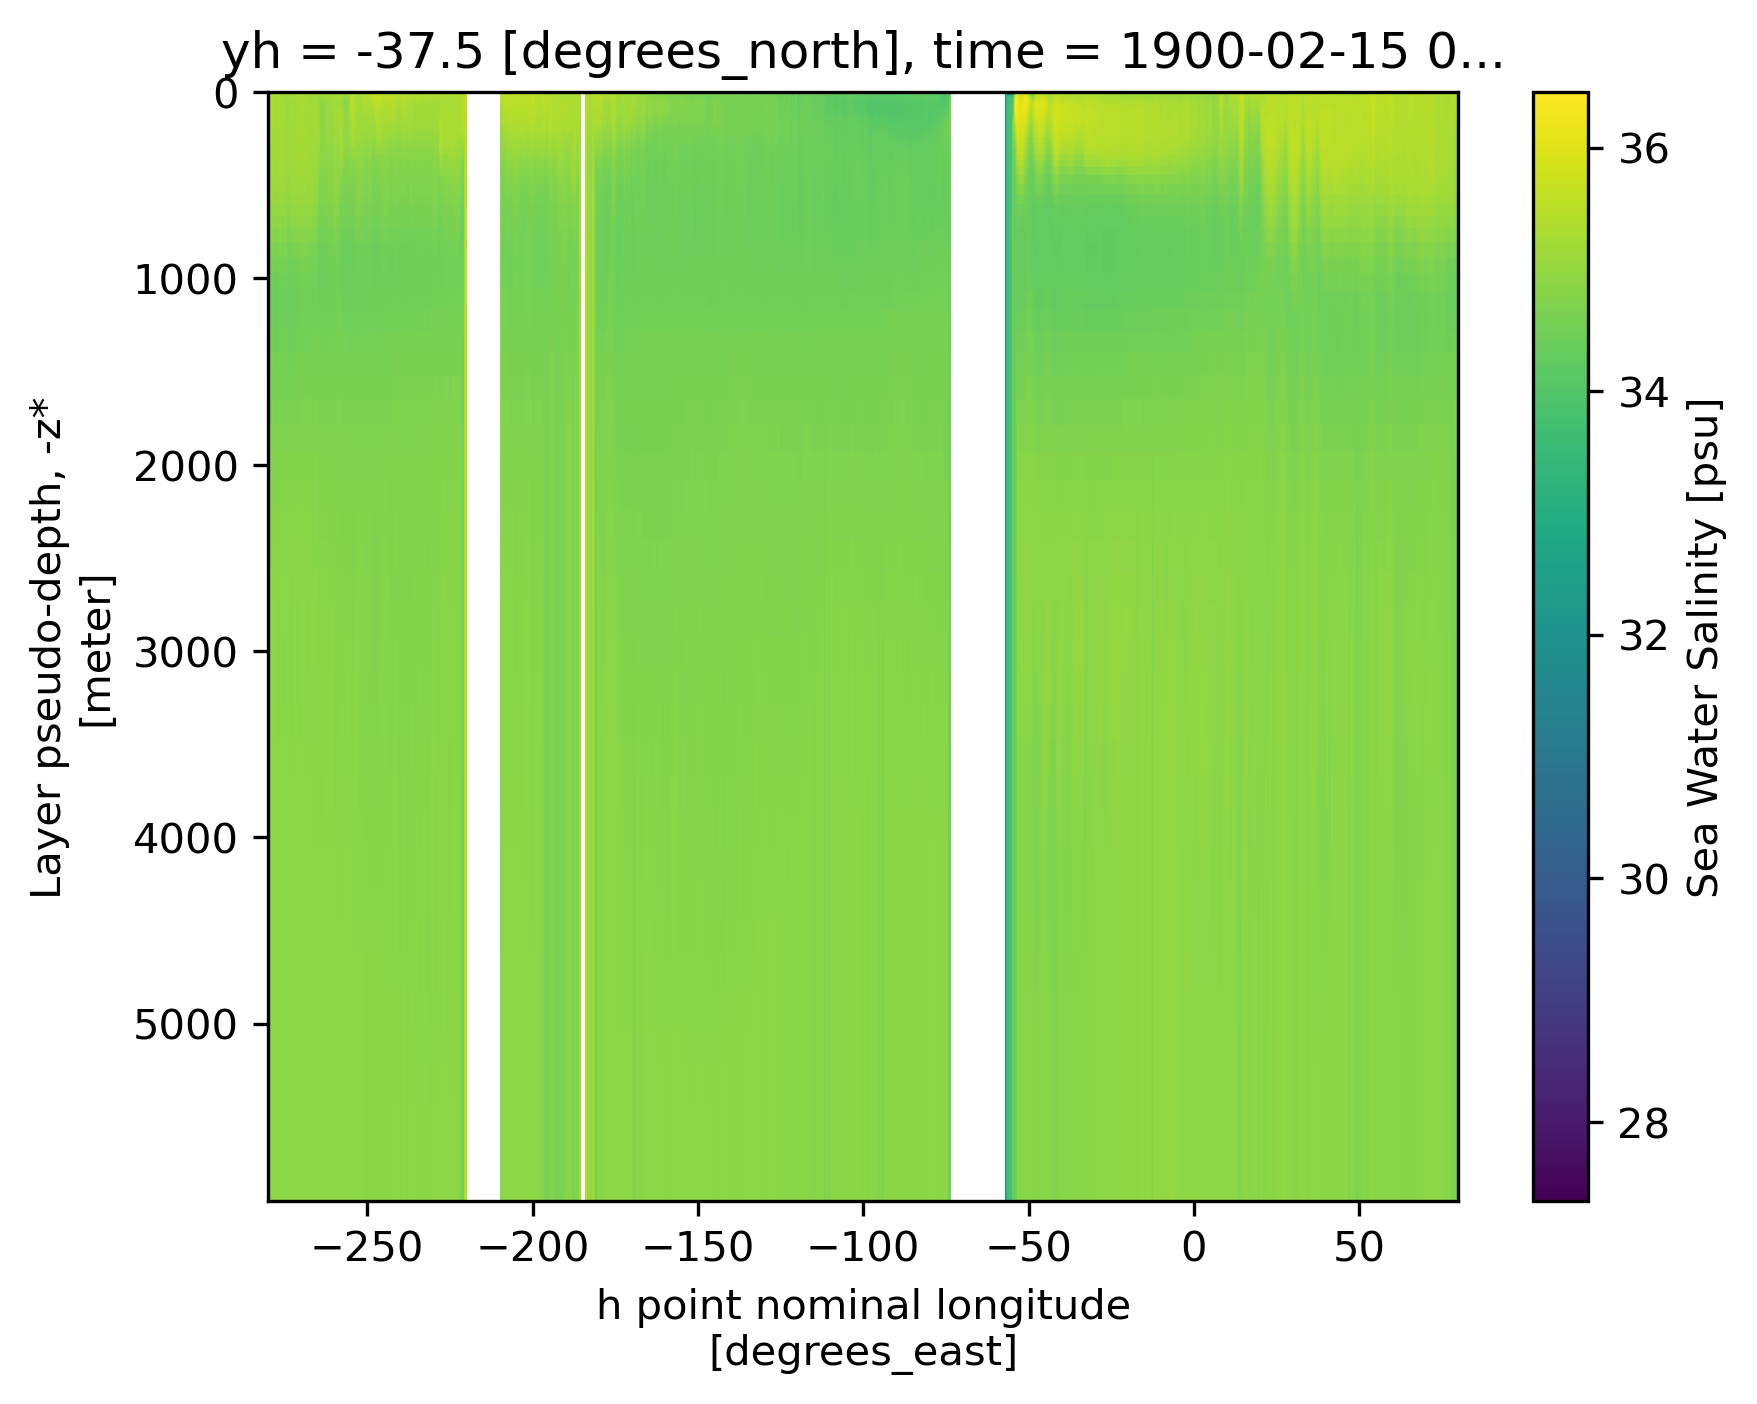

In [17]:
fig, axes = plt.subplots(dpi = 300)

salt.so.isel(time = -1, yh = -1).plot(yincrease = False)

Text(0.5, 1.0, 'Open boundary condition input')

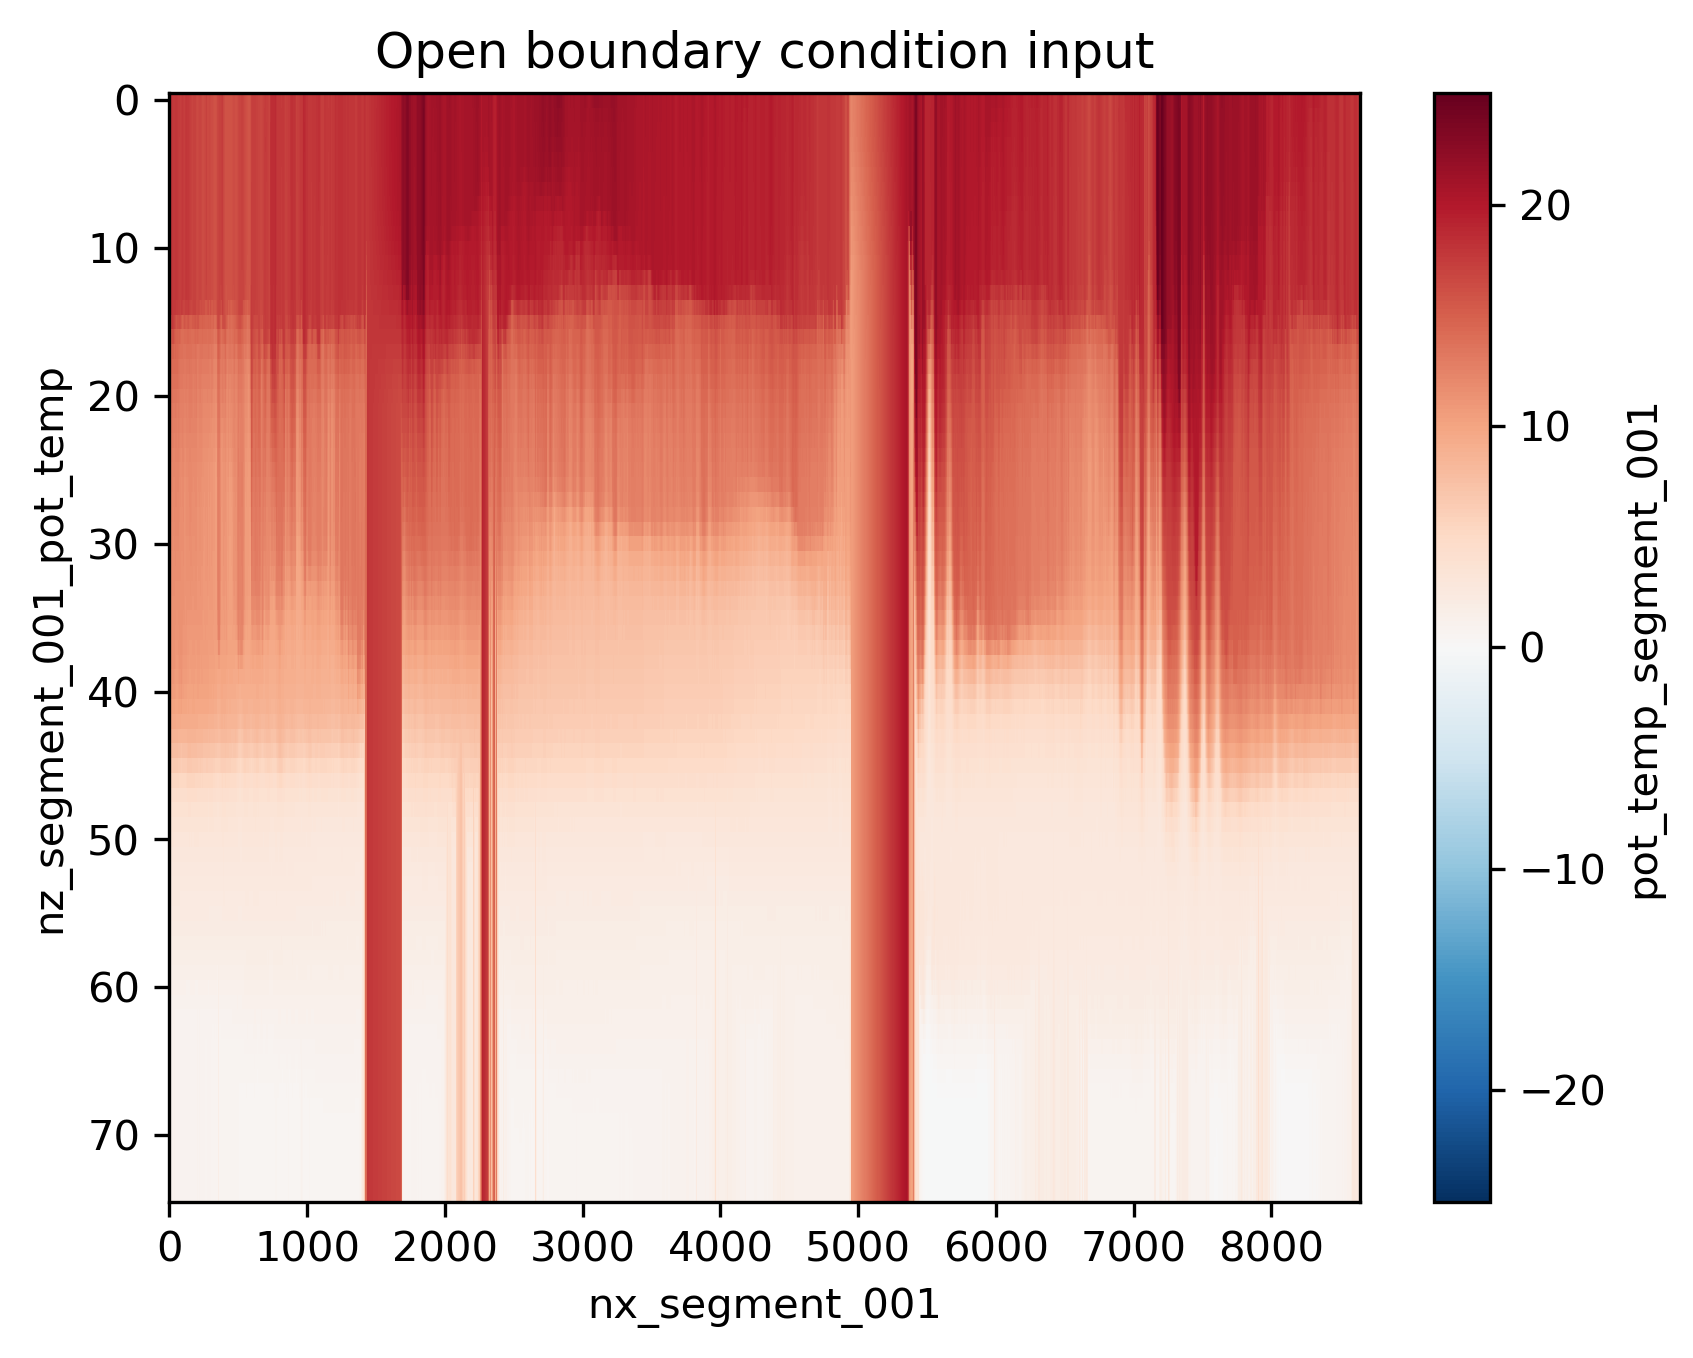

In [15]:
fig, axes = plt.subplots(dpi = 300)
OBC_in.isel(time = 45).pot_temp_segment_001.plot(yincrease = False) #seems to be conservative temp from OM2, just named badly?
plt.title('Open boundary condition input')

In [5]:
OBC_in.dz_pot_temp_segment_001.isel(time = 0,ny_segment_001=0).sum('nz_segment_001_pot_temp')#.plot()

<xarray.DataArray 'dz_pot_temp_segment_001' (nx_segment_001: 8641)> Size: 69kB
dask.array<sum-aggregate, shape=(8641,), dtype=float64, chunksize=(8641,), chunktype=numpy.ndarray>
Coordinates:
    time            object 8B 1900-01-01 12:00:00
  * nx_segment_001  (nx_segment_001) int32 35kB 0 1 2 3 ... 8637 8638 8639 8640
    ny_segment_001  int32 4B 0

In [6]:
ocean_hgrid = xr.open_dataset('/g/data/x77/cy8964/mom6/input/input-8km/ocean_hgrid_cropped.nc')
ocean_hgrid

<xarray.Dataset> Size: 1GB
Dimensions:   (nyp: 2885, nxp: 8641, ny: 2884, nx: 8640)
Dimensions without coordinates: nyp, nxp, ny, nx
Data variables:
    angle_dx  (nyp, nxp) float64 199MB ...
    area      (ny, nx) float64 199MB ...
    dx        (nyp, nx) float64 199MB ...
    dy        (ny, nxp) float64 199MB ...
    tile      |S255 255B ...
    x         (nyp, nxp) float64 199MB ...
    y         (nyp, nxp) float64 199MB ...
Attributes:
    history:      Mon May 19 15:49:38 2025: ncks -d nyp,0,2884 -d ny,0,2883 o...
    description:  This is an orthogonal coordinate grid for the Earth with a ...
    source:       ocean_grid_generator.py had git hash 869c6153fb373bc69b338c...
    NCO:          netCDF Operators version 5.0.5 (Homepage = http://nco.sf.ne...

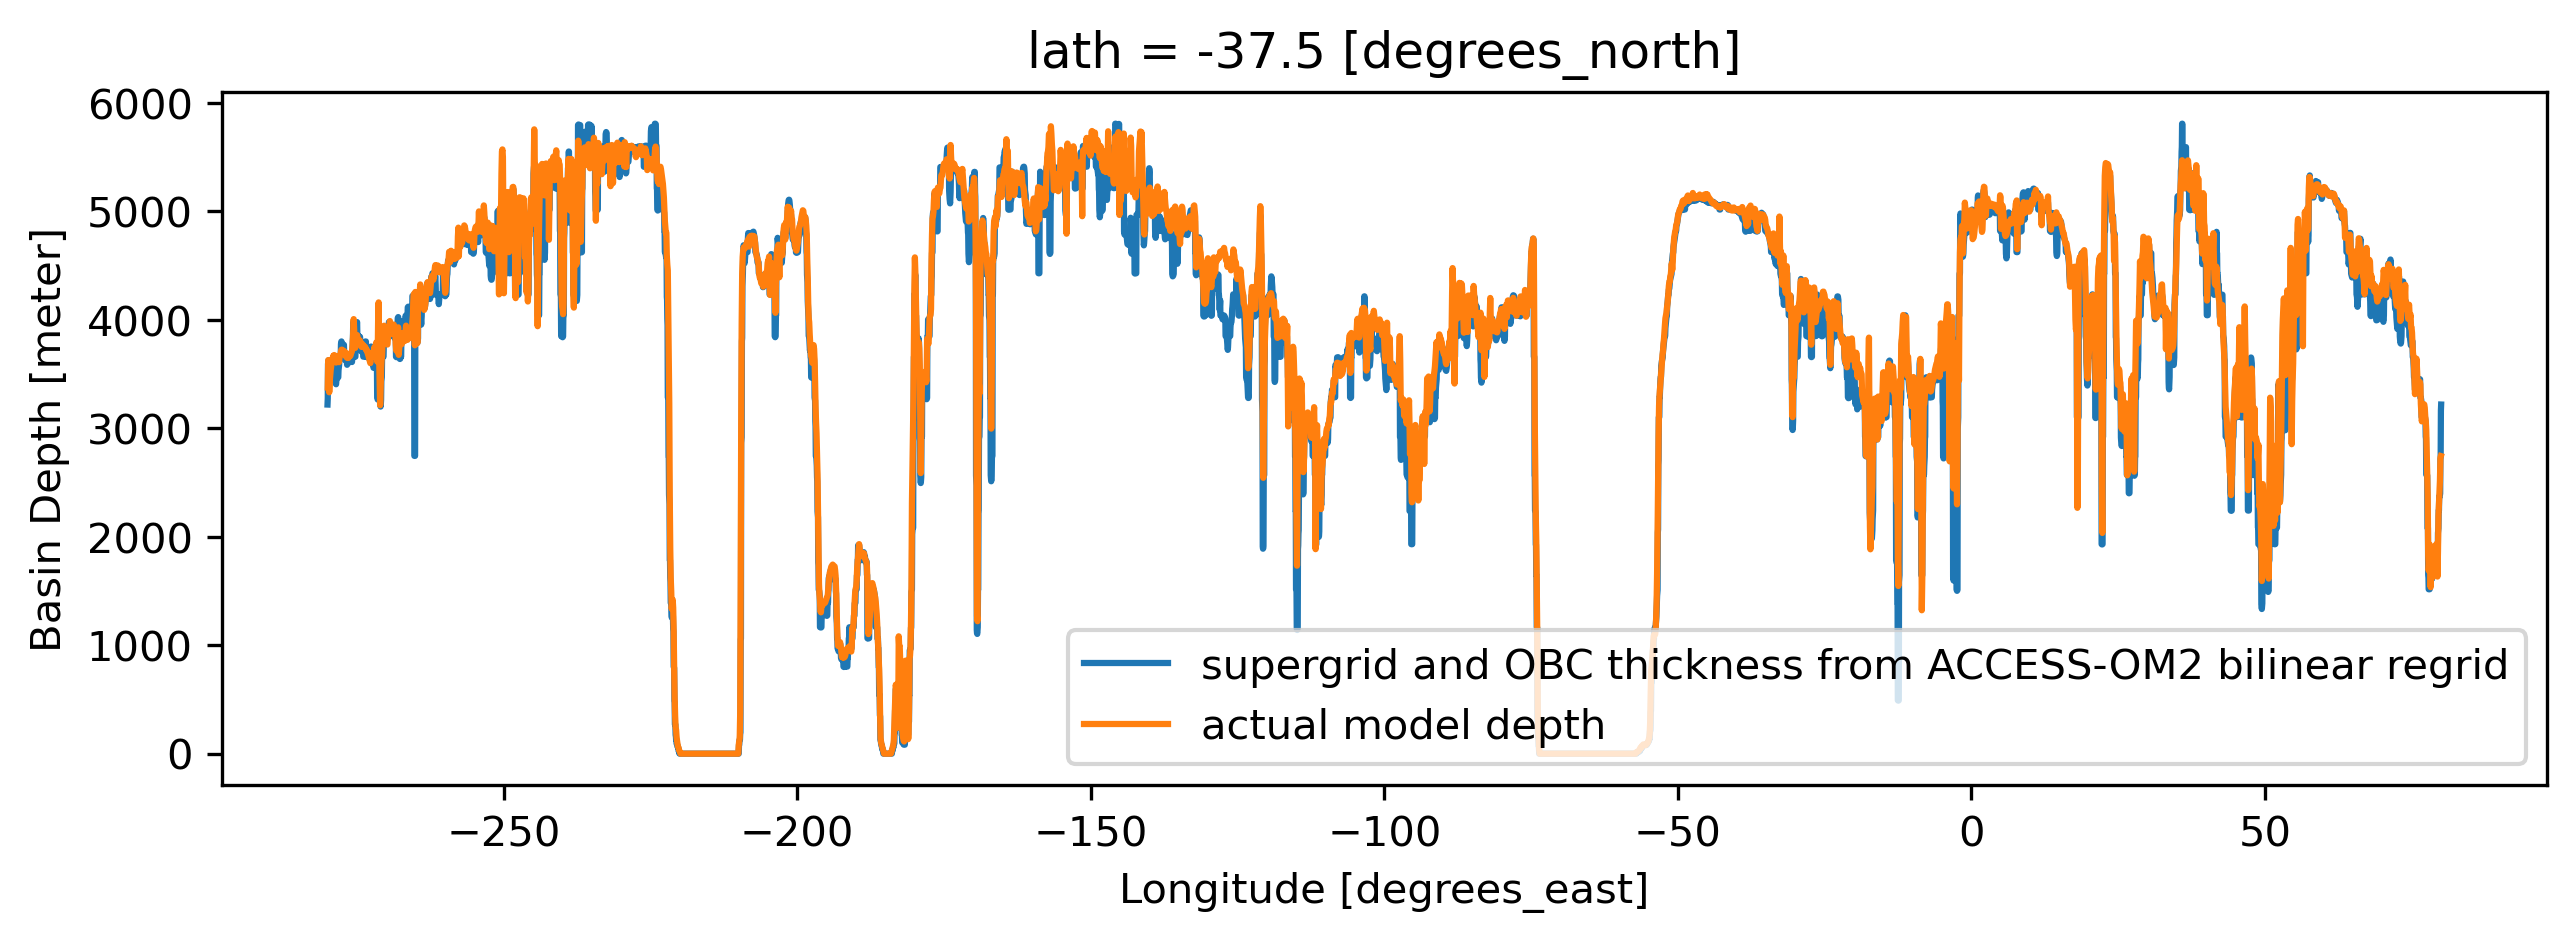

In [10]:
fig, axes = plt.subplots(dpi = 300,figsize = (10,3))
plt.plot(ocean_hgrid.x.isel(nyp = -1).values,
         OBC_in.dz_pot_temp_segment_001.isel(time = 0,ny_segment_001=0).sum('nz_segment_001_pot_temp').values,
        label = 'supergrid and OBC thickness from ACCESS-OM2 bilinear regrid')
ocean_geometry.D.isel(lath = -1).plot(label = 'actual model depth')
plt.legend()

Text(0.5, 1.0, 'Zoom in on eastern South America (left is land)')

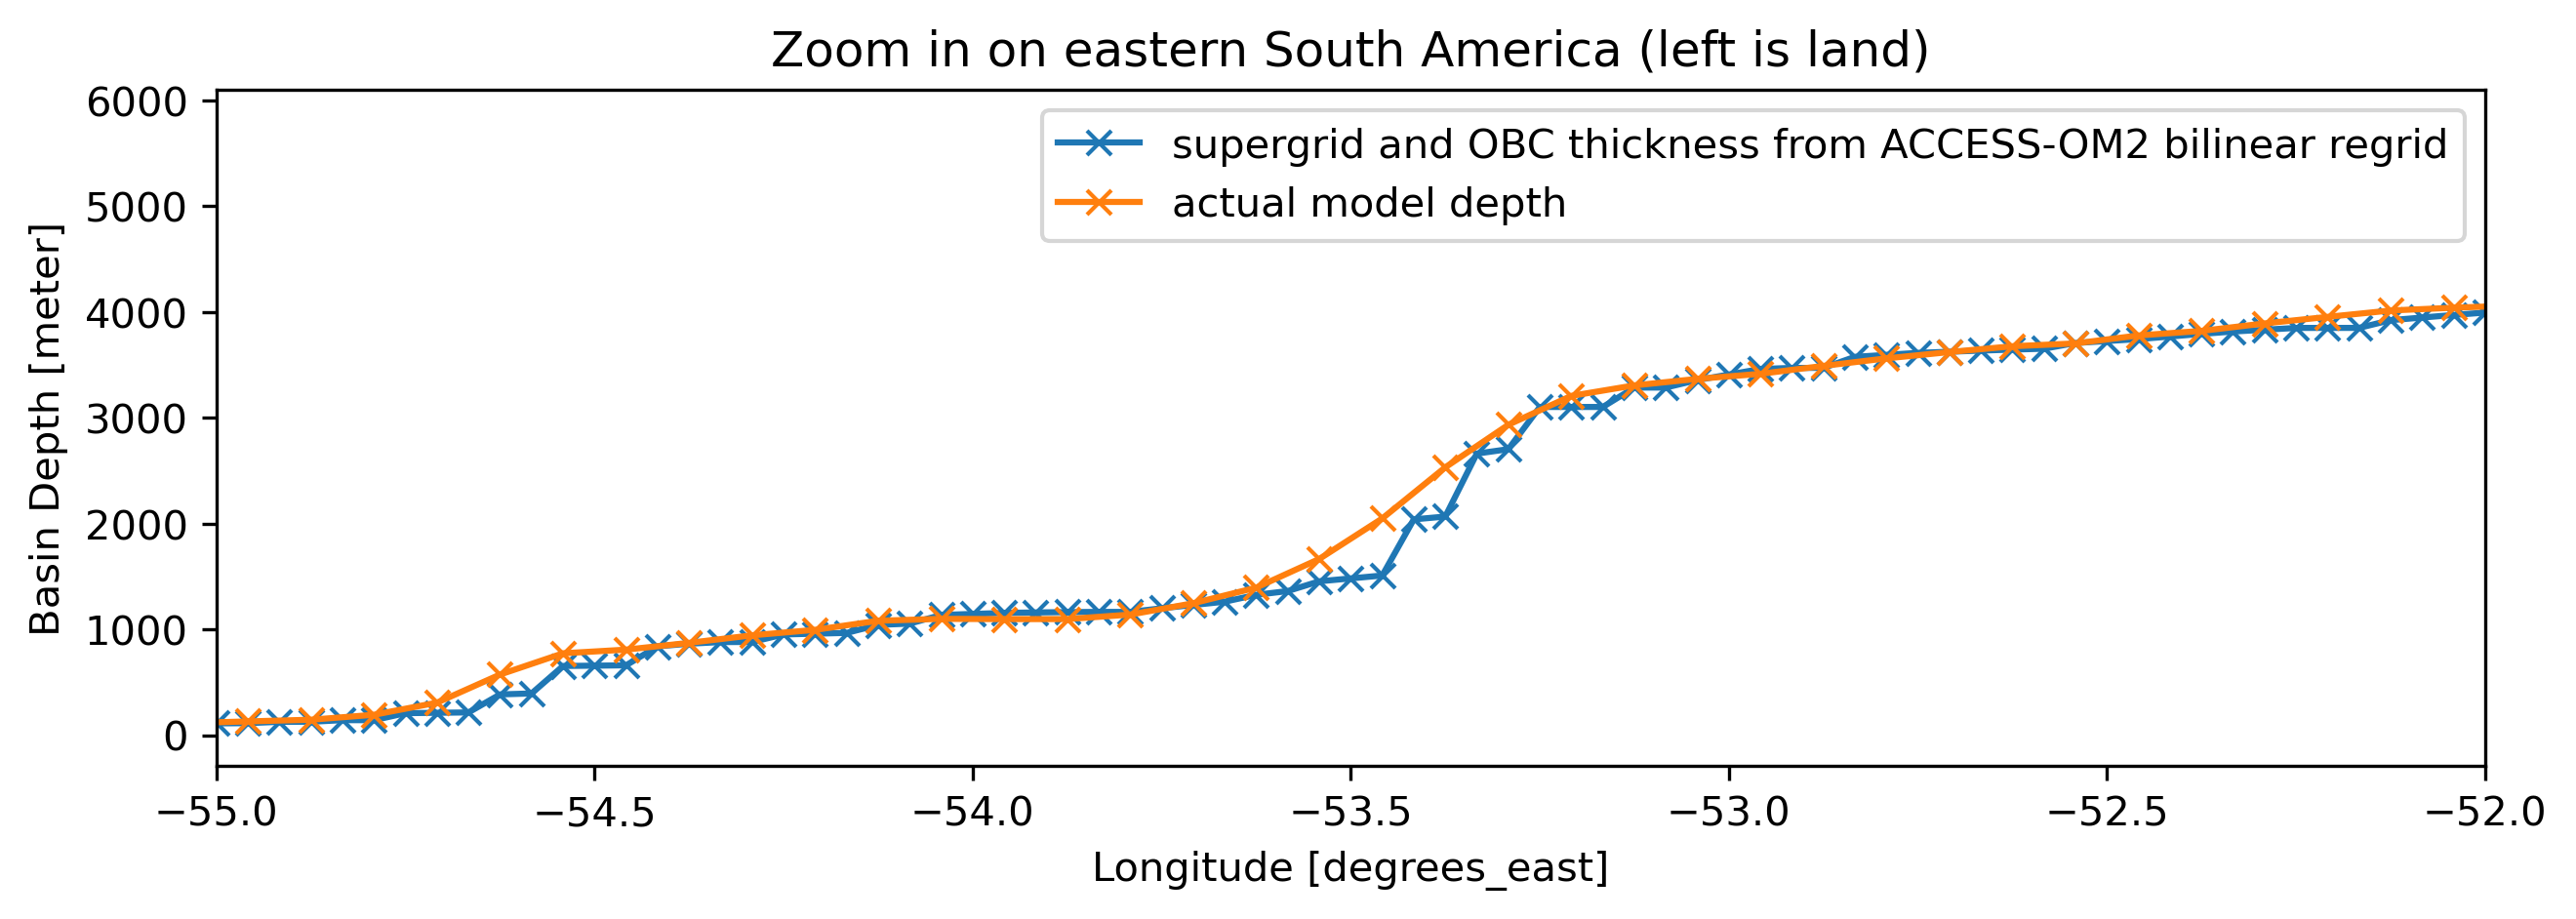

In [29]:
fig, axes = plt.subplots(dpi = 300,figsize = (10,3))
plt.plot(ocean_hgrid.x.isel(nyp = -1).values,
         OBC_in.dz_pot_temp_segment_001.isel(time = 0,ny_segment_001=0).sum('nz_segment_001_pot_temp').values,
        label = 'supergrid and OBC thickness from ACCESS-OM2 bilinear regrid', marker = 'x')
ocean_geometry.D.isel(lath = -1).plot(label = 'actual model depth', marker = 'x')
plt.xlim(-55,-52)
plt.legend()
plt.title('Zoom in on eastern South America (left is land)')

In [16]:
ocean_hgrid005 = xr.open_dataset('/g/data/ik11/inputs/mom6/panan/005deg/20241214/ocean_hgrid.nc')
ocean_hgrid005

<xarray.Dataset> Size: 2GB
Dimensions:   (nyp: 3381, nxp: 14401, nx: 14400, ny: 3380)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 255B ...
    x         (nyp, nxp) float64 390MB ...
    y         (nyp, nxp) float64 390MB ...
    dx        (nyp, nx) float64 389MB ...
    dy        (ny, nxp) float64 389MB ...
    area      (ny, nx) float64 389MB ...
    angle_dx  (nyp, nxp) float64 390MB ...
    arcx      |S255 255B ...
Attributes:
    grid_version:  0.2
    code_version:  $Name: tikal $
    history:       /scratch/x77/ahg157/mom5/src/tools/make_hgrid/make_hgrid -...

In [17]:
OBC_in_panan005 = xr.open_mfdataset('/g/data/g40/akm157/inputs/mom6/panan/panan_005/forcing_access_yr2_005.nc')


In [19]:
ocean_geometry005 = xr.open_mfdataset('/g/data/ol01/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/output000/19910101.ocean_static.nc')


In [21]:
ocean_geometry005

<xarray.Dataset> Size: 1GB
Dimensions:       (xh: 7200, yh: 1690, time: 1, xq: 7201, yq: 1691)
Coordinates:
  * xh            (xh) float64 58kB -280.0 -279.9 -279.9 ... 79.87 79.92 79.97
  * yh            (yh) float64 14kB -81.1 -81.08 -81.06 ... -37.16 -37.12 -37.08
  * time          (time) object 8B 1991-01-01 00:00:00
  * xq            (xq) float64 58kB -280.0 -279.9 -279.9 ... 79.9 79.95 80.0
  * yq            (yq) float64 14kB -81.11 -81.09 -81.07 ... -37.14 -37.1 -37.06
Data variables: (12/24)
    areacello     (yh, xh) float32 49MB dask.array<chunksize=(188, 200), meta=np.ndarray>
    deptho        (yh, xh) float32 49MB dask.array<chunksize=(188, 200), meta=np.ndarray>
    Coriolis      (yq, xq) float32 49MB dask.array<chunksize=(189, 201), meta=np.ndarray>
    geolon        (yh, xh) float32 49MB dask.array<chunksize=(188, 200), meta=np.ndarray>
    geolat        (yh, xh) float32 49MB dask.array<chunksize=(188, 200), meta=np.ndarray>
    geolon_c      (yq, xq) float32 49MB dask.array<chunksize=(189, 201), meta=np.ndarray>
    ...            ...
    dyCu          (yh, xq) float32 49MB dask.array<chunksize=(188, 201), meta=np.ndarray>
    dxCv          (yq, xh) float32 49MB dask.array<chunksize=(189, 200), meta=np.ndarray>
    dyCv          (yq, xh) float32 49MB dask.array<chunksize=(189, 200), meta=np.ndarray>
    areacello_cu  (yh, xq) float32 49MB dask.array<chunksize=(188, 201), meta=np.ndarray>
    areacello_cv  (yq, xh) float32 49MB dask.array<chunksize=(189, 200), meta=np.ndarray>
    areacello_bu  (yq, xq) float32 49MB dask.array<chunksize=(189, 201), meta=np.ndarray>
Attributes:
    title:      panan
    grid_type:  regular
    grid_tile:  N/A
    history:    20241216T0516Z: /scratch/x77/ahg157/software/mppnccombine-fas...

Text(0.5, 1.0, 'panan005: Zoom in on eastern South America (left is land)')

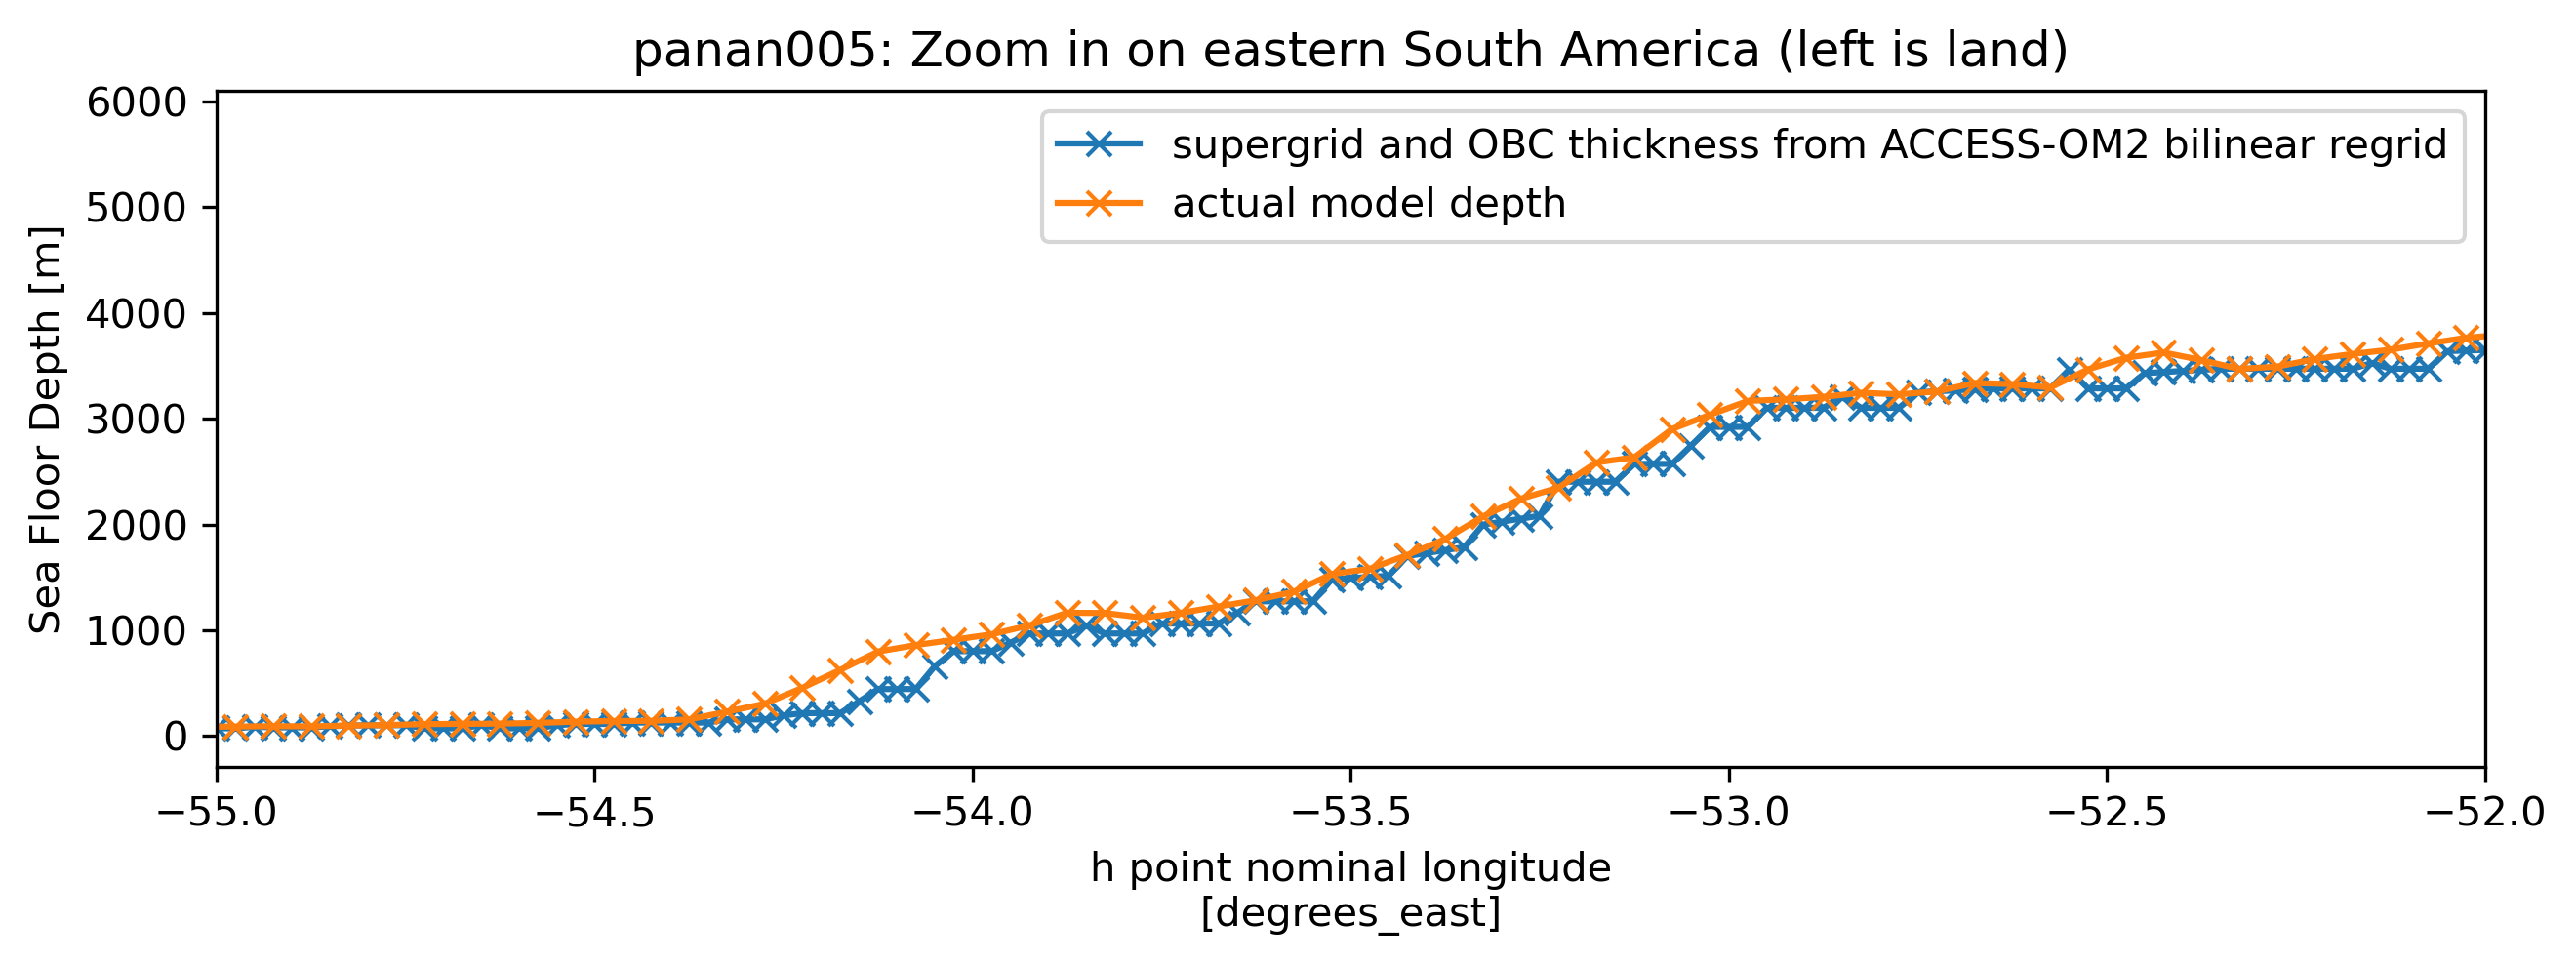

In [30]:
fig, axes = plt.subplots(dpi = 300,figsize = (10,3))
plt.plot(ocean_hgrid005.x.isel(nyp = -1).values,
         OBC_in_panan005.dz_pot_temp_segment_001.isel(time = 0,ny_segment_001=0).sum('nz_segment_001_pot_temp').values,
        label = 'supergrid and OBC thickness from ACCESS-OM2 bilinear regrid', marker = 'x')
ocean_geometry005.deptho.isel(yh = -1).plot(label = 'actual model depth', marker = 'x')
plt.xlim(-55,-52)
plt.legend()
plt.title('panan005: Zoom in on eastern South America (left is land)')

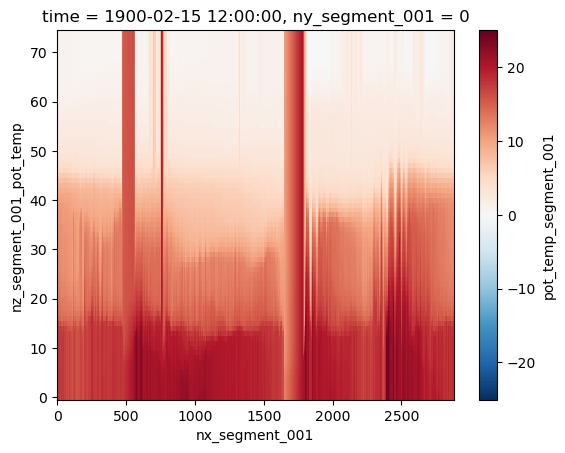

In [16]:
OBC_in_25k.isel(time = 45).pot_temp_segment_001.plot() #seems to be conservative temp from OM2, just named badly?

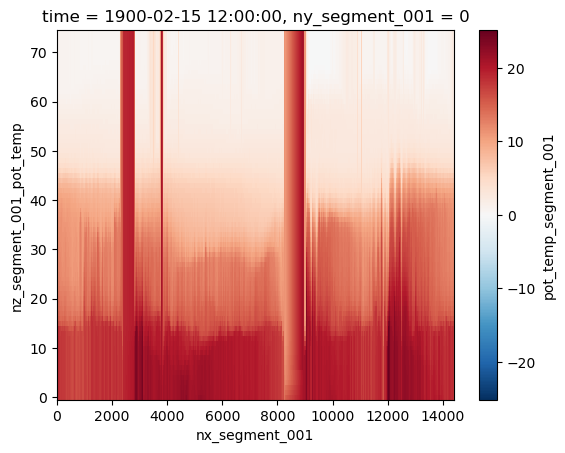

In [20]:
OBC_in_panan005.isel(time = 45).pot_temp_segment_001.plot() #seems to be conservative temp from OM2, just named badly?

In [30]:
OBC_in_panan005.isel(time = 45)

<xarray.Dataset> Size: 70MB
Dimensions:                  (nz_segment_001_pot_temp: 75, ny_segment_001: 1,
                              nx_segment_001: 14401, nz_segment_001_salt: 75,
                              nz_segment_001_u: 75, nz_segment_001_v: 75)
Coordinates:
    time                     object 8B 1900-02-15 12:00:00
  * nz_segment_001_u         (nz_segment_001_u) int32 300B 0 1 2 3 ... 72 73 74
  * nz_segment_001_v         (nz_segment_001_v) int32 300B 0 1 2 3 ... 72 73 74
  * nz_segment_001_pot_temp  (nz_segment_001_pot_temp) int32 300B 0 1 ... 73 74
  * nz_segment_001_salt      (nz_segment_001_salt) int32 300B 0 1 2 ... 72 73 74
  * nx_segment_001           (nx_segment_001) int32 58kB 0 1 2 ... 14399 14400
  * ny_segment_001           (ny_segment_001) int32 4B 0
Data variables:
    pot_temp_segment_001     (nz_segment_001_pot_temp, ny_segment_001, nx_segment_001) float64 9MB dask.array<chunksize=(75, 1, 14401), meta=np.ndarray>
    salt_segment_001         (nz_segment_001_salt, ny_segment_001, nx_segment_001) float64 9MB dask.array<chunksize=(75, 1, 14401), meta=np.ndarray>
    eta_t_segment_001        (ny_segment_001, nx_segment_001) float64 115kB dask.array<chunksize=(1, 14401), meta=np.ndarray>
    u_segment_001            (nz_segment_001_u, ny_segment_001, nx_segment_001) float64 9MB dask.array<chunksize=(75, 1, 14401), meta=np.ndarray>
    v_segment_001            (nz_segment_001_v, ny_segment_001, nx_segment_001) float64 9MB dask.array<chunksize=(75, 1, 14401), meta=np.ndarray>
    dz_u_segment_001         (nz_segment_001_u, ny_segment_001, nx_segment_001) float64 9MB dask.array<chunksize=(75, 1, 14401), meta=np.ndarray>
    dz_v_segment_001         (nz_segment_001_v, ny_segment_001, nx_segment_001) float64 9MB dask.array<chunksize=(75, 1, 14401), meta=np.ndarray>
    dz_pot_temp_segment_001  (nz_segment_001_pot_temp, ny_segment_001, nx_segment_001) float64 9MB dask.array<chunksize=(75, 1, 14401), meta=np.ndarray>
    dz_salt_segment_001      (nz_segment_001_salt, ny_segment_001, nx_segment_001) float64 9MB dask.array<chunksize=(75, 1, 14401), meta=np.ndarray>
    ilist_segment_001        (ny_segment_001, nx_segment_001) float64 115kB dask.array<chunksize=(1, 14401), meta=np.ndarray>
    jlist_segment_001        (ny_segment_001, nx_segment_001) float64 115kB dask.array<chunksize=(1, 14401), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear
    NCO:            netCDF Operators version 5.1.3 (Homepage = http://nco.sf....
    history:        Mon Mar 27 10:35:37 2023: ncatted -a _FillValue,jlist_seg...

Text(0.5, 1.0, 'Temp at bottom layer of 37.5S boundary')

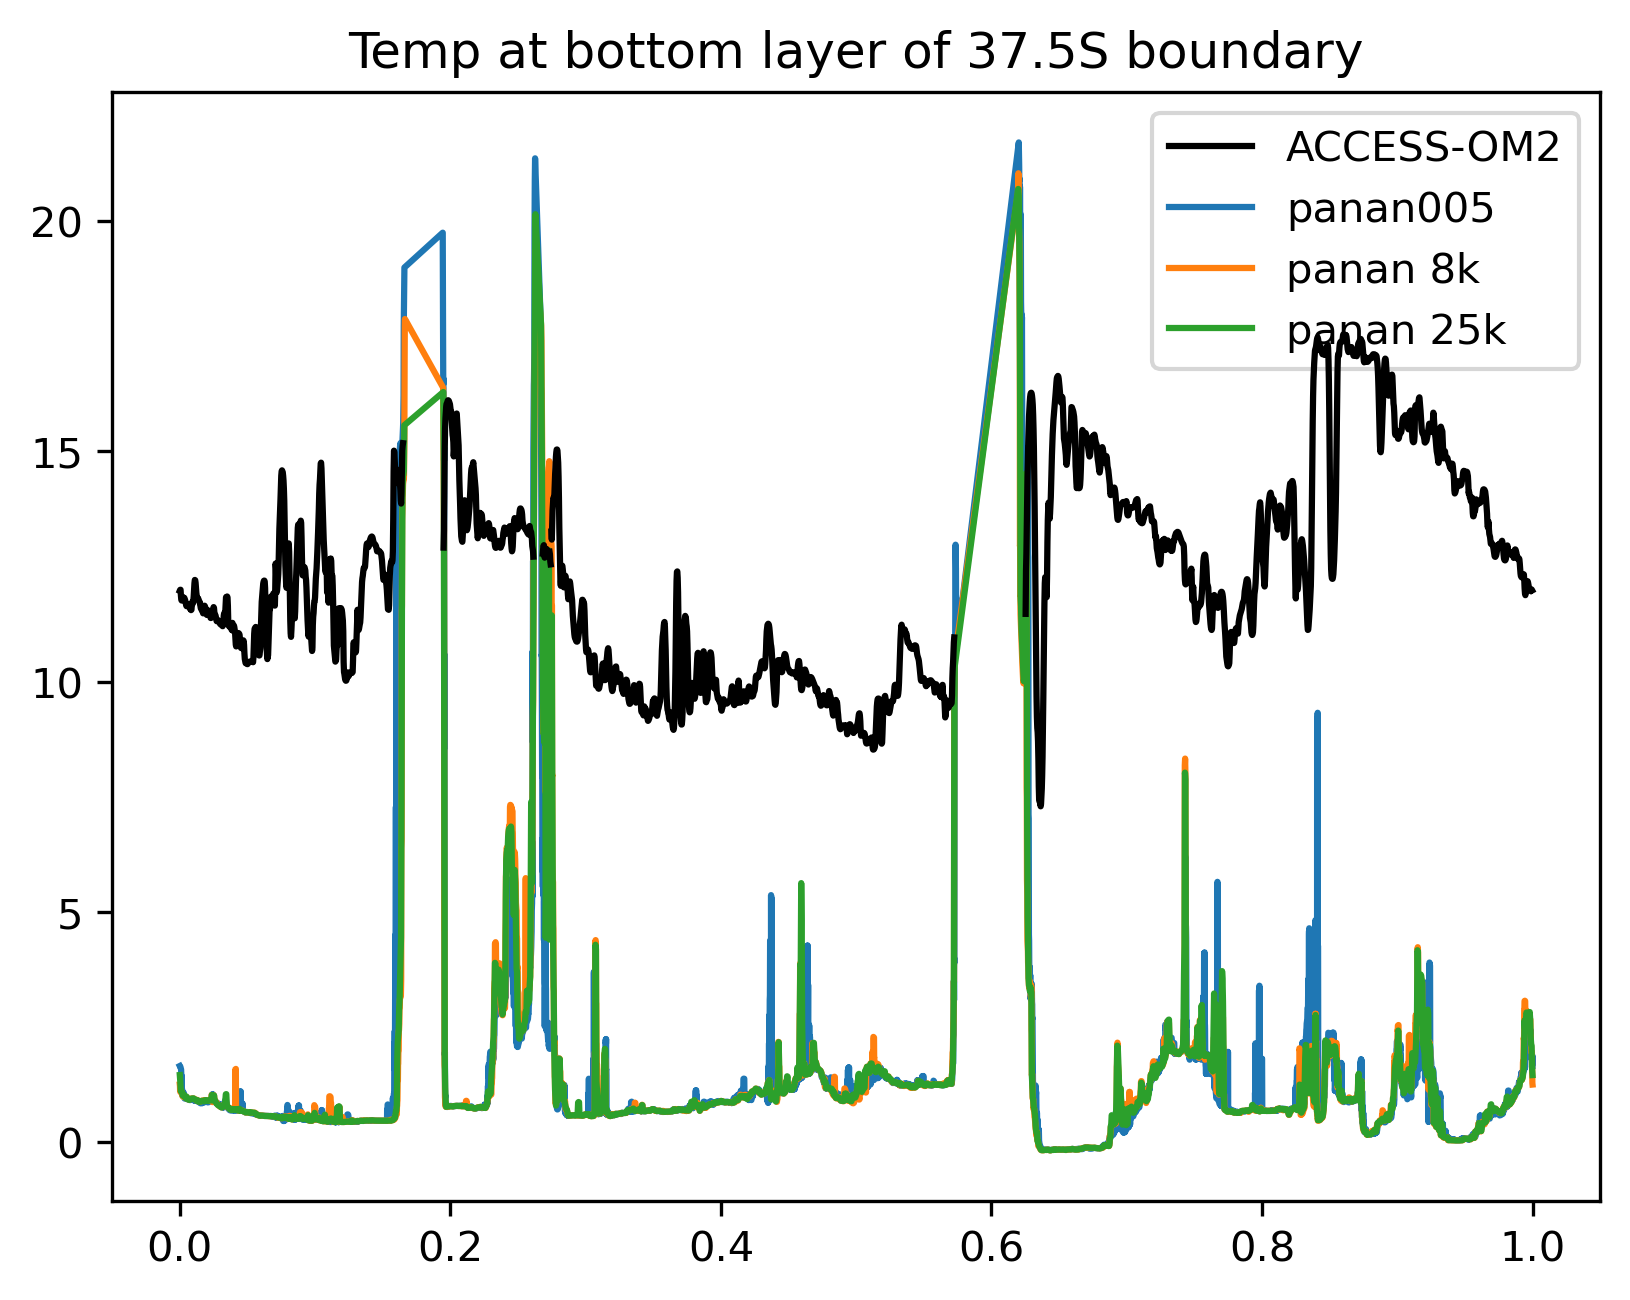

In [42]:
fig, axes = plt.subplots(dpi = 300)
access = (ACCESS_OM2.temp.sel(yt_ocean = -37.5, method = 'nearest').isel(time = 2,st_ocean = 30)-273.15)
plt.plot(np.arange(len(access.xt_ocean))/len(access.xt_ocean),
        access.values,
        label = 'ACCESS-OM2', color = 'k', zorder = 10)

plt.plot(OBC_in_panan005.nx_segment_001.values/np.max(OBC_in_panan005.nx_segment_001.values),
    OBC_in_panan005.isel(time = 45).pot_temp_segment_001.isel(nz_segment_001_pot_temp = -1,ny_segment_001 = 0).values,
    label = 'panan005')
plt.plot(OBC_in.nx_segment_001.values/np.max(OBC_in.nx_segment_001.values),
    OBC_in.isel(time = 45).pot_temp_segment_001.isel(nz_segment_001_pot_temp = -1,ny_segment_001 = 0).values,
    label = 'panan 8k')
plt.plot(OBC_in_25k.nx_segment_001.values/np.max(OBC_in_25k.nx_segment_001.values),
    OBC_in_25k.isel(time = 45).pot_temp_segment_001.isel(nz_segment_001_pot_temp = -1,ny_segment_001 = 0).values,
    label = 'panan 25k')
plt.legend()
plt.title('Temp at bottom layer of 37.5S boundary')

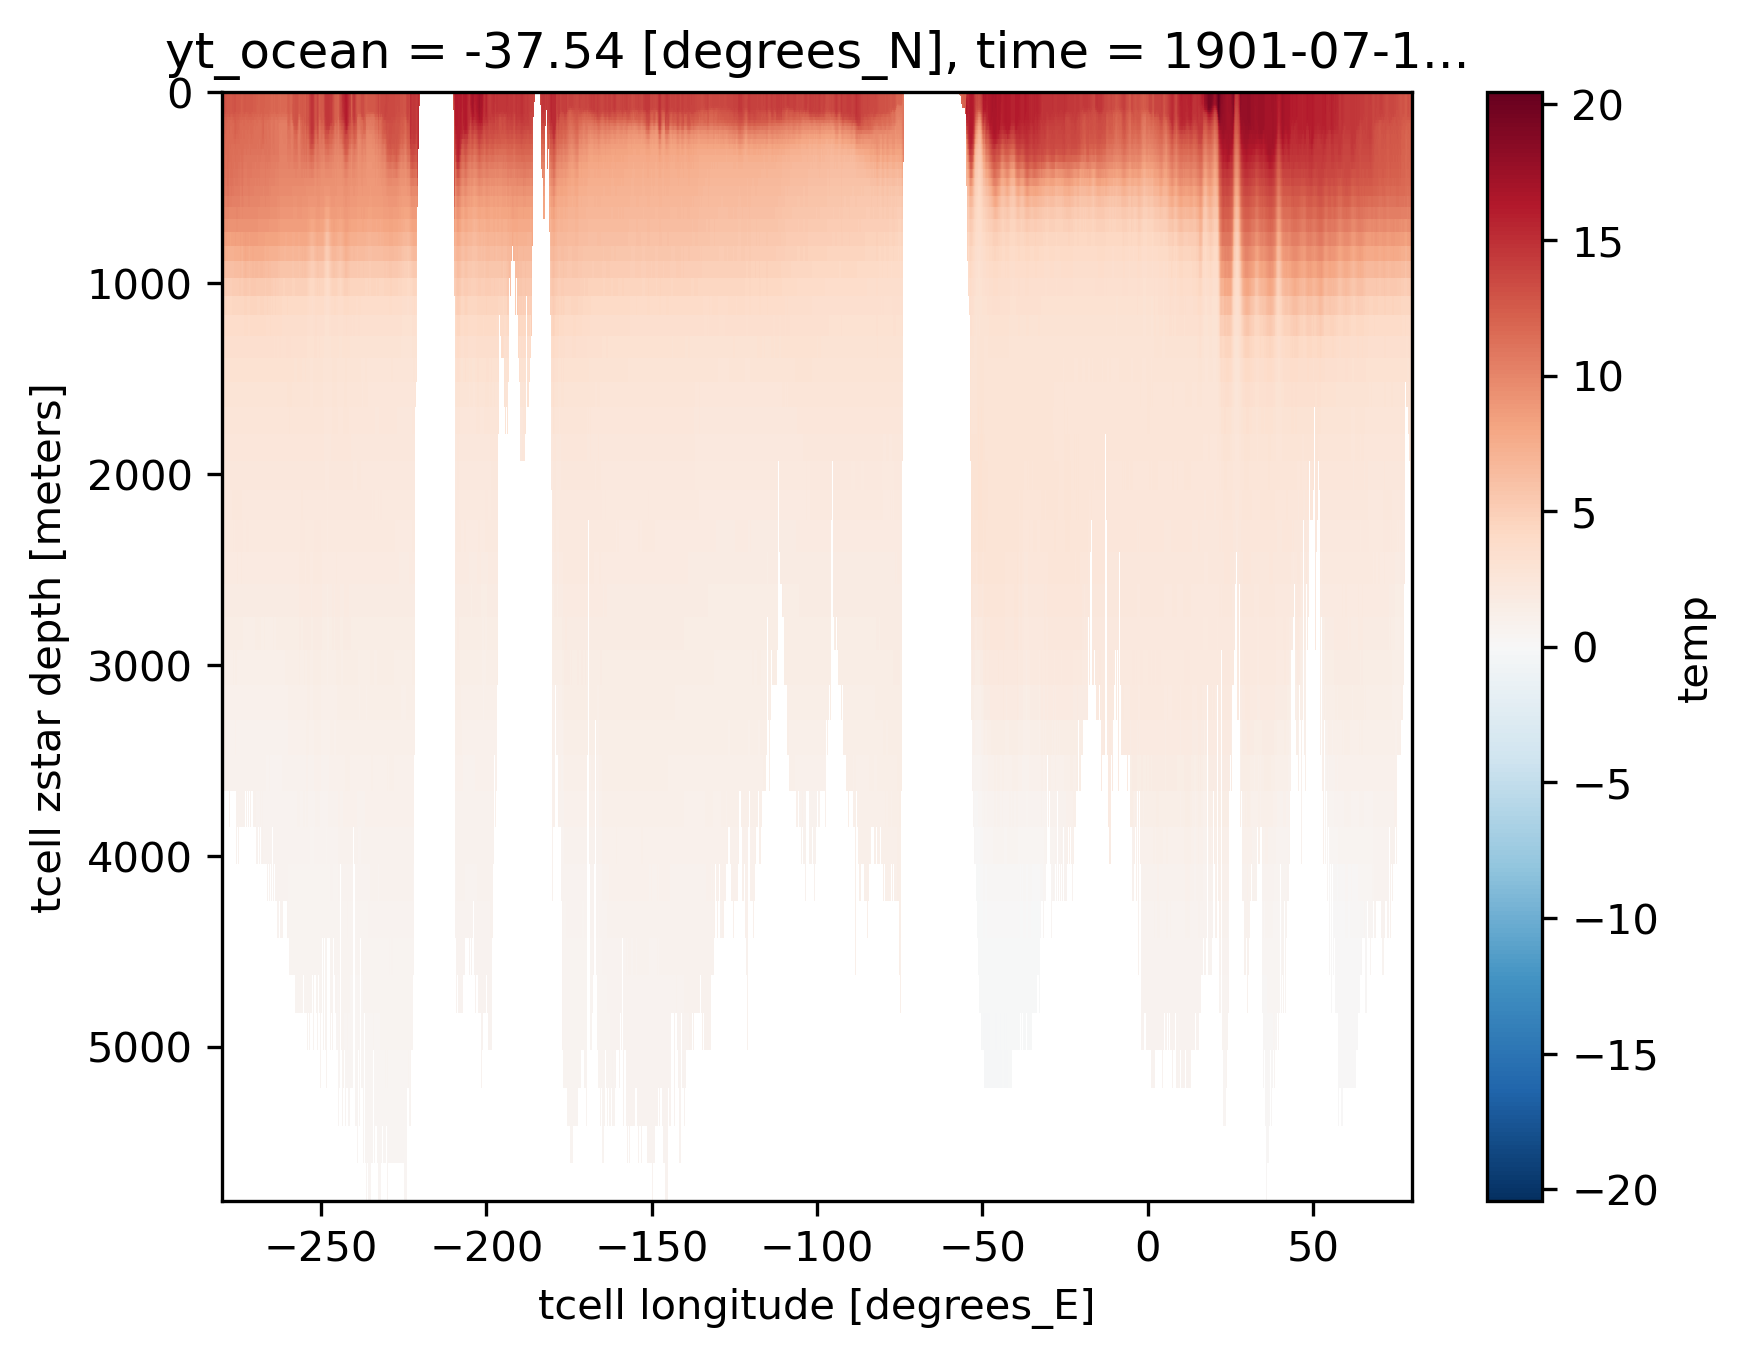

In [26]:
fig, axes = plt.subplots(dpi = 300)
(ACCESS_OM2.temp.sel(yt_ocean = -37.5, method = 'nearest').isel(time = 2)-273.15).plot(yincrease = False)

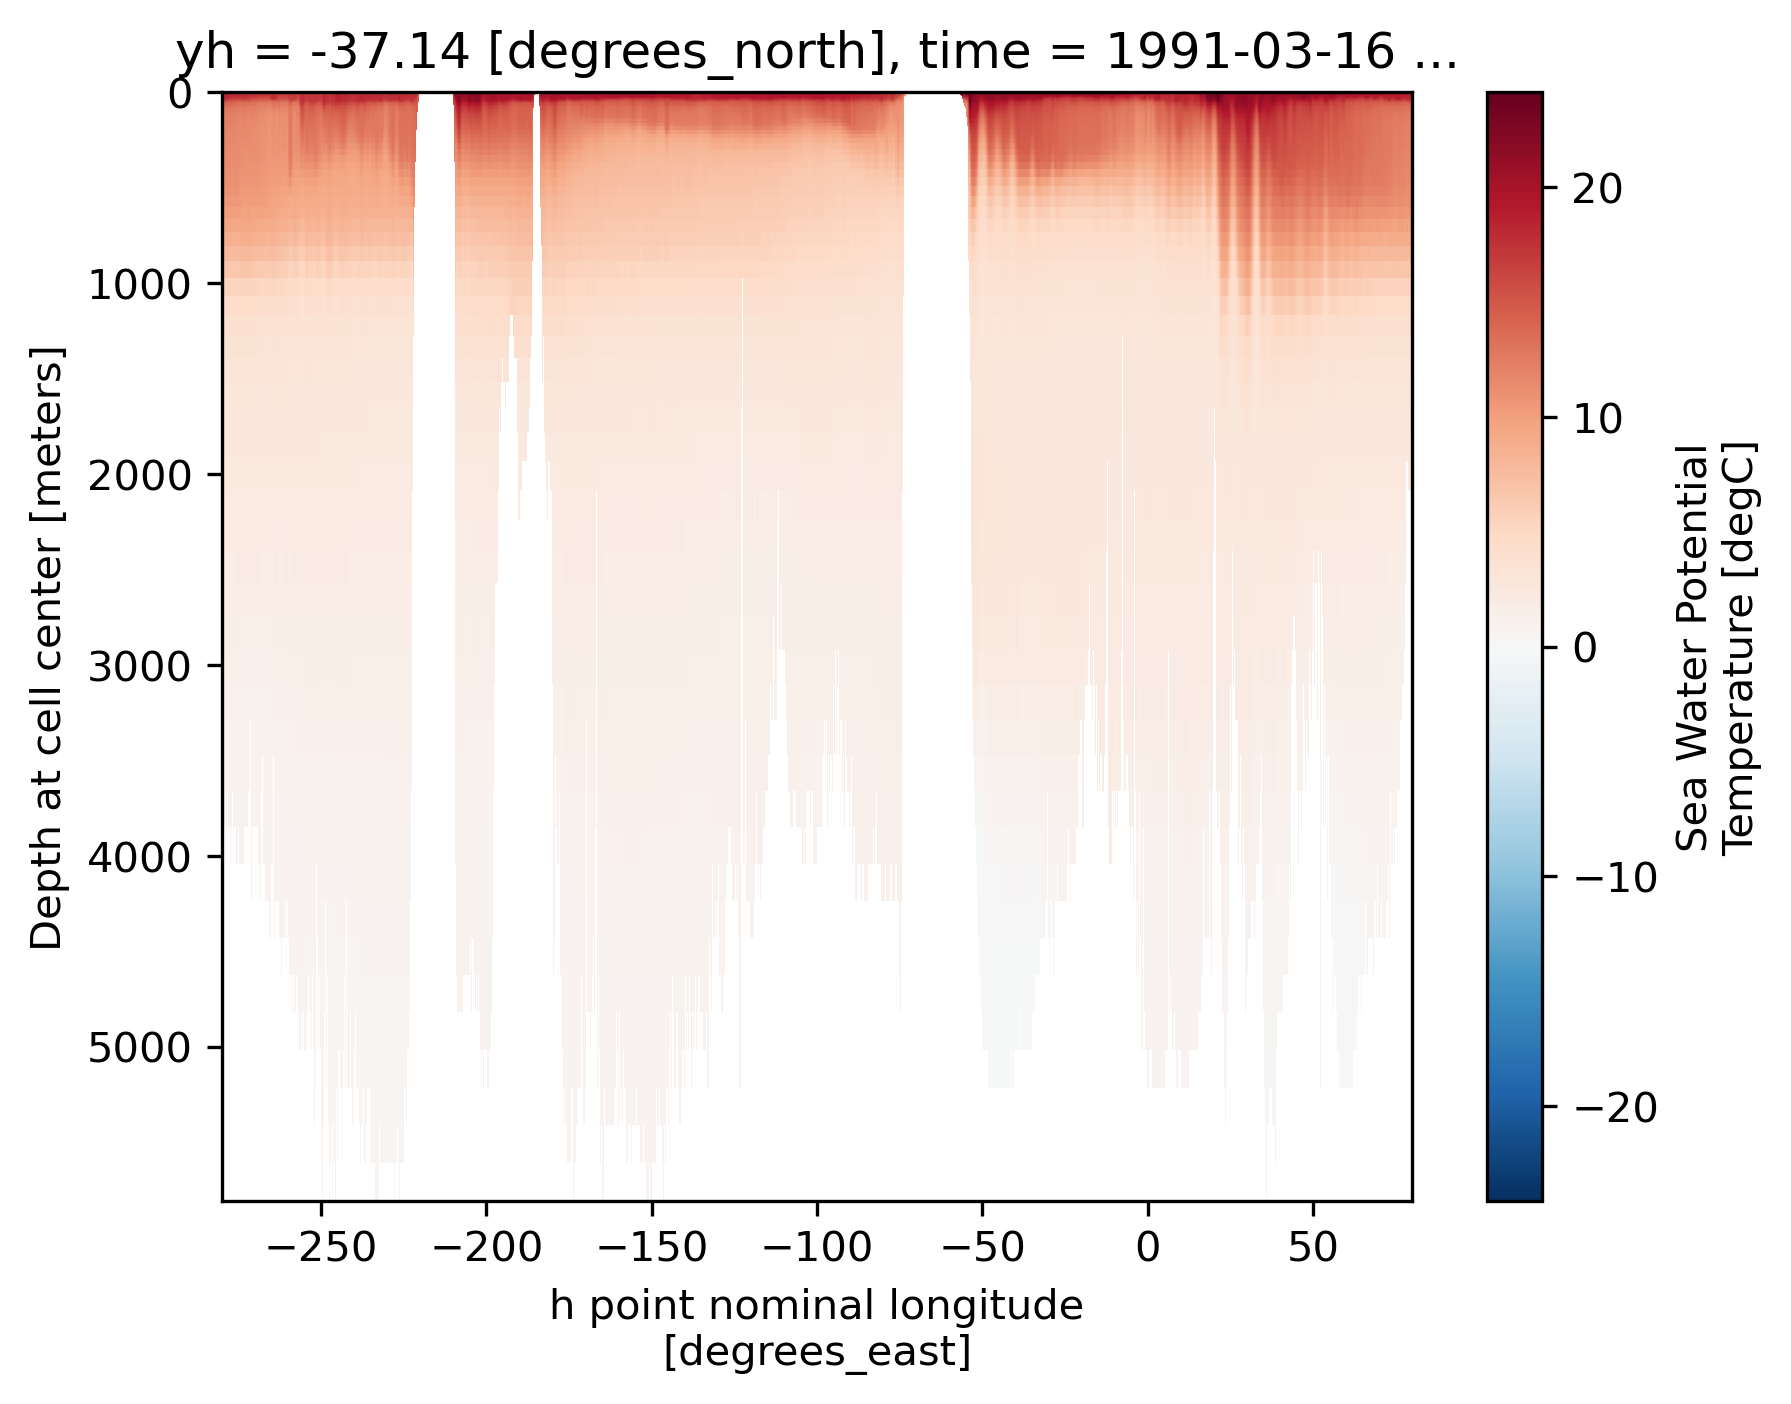

In [11]:
fig, axes = plt.subplots(dpi = 300)

panan01.thetao.isel(time = 2, yh = -1).plot(yincrease = False)

Text(0.5, 1.0, 'panan005 OBC temp')

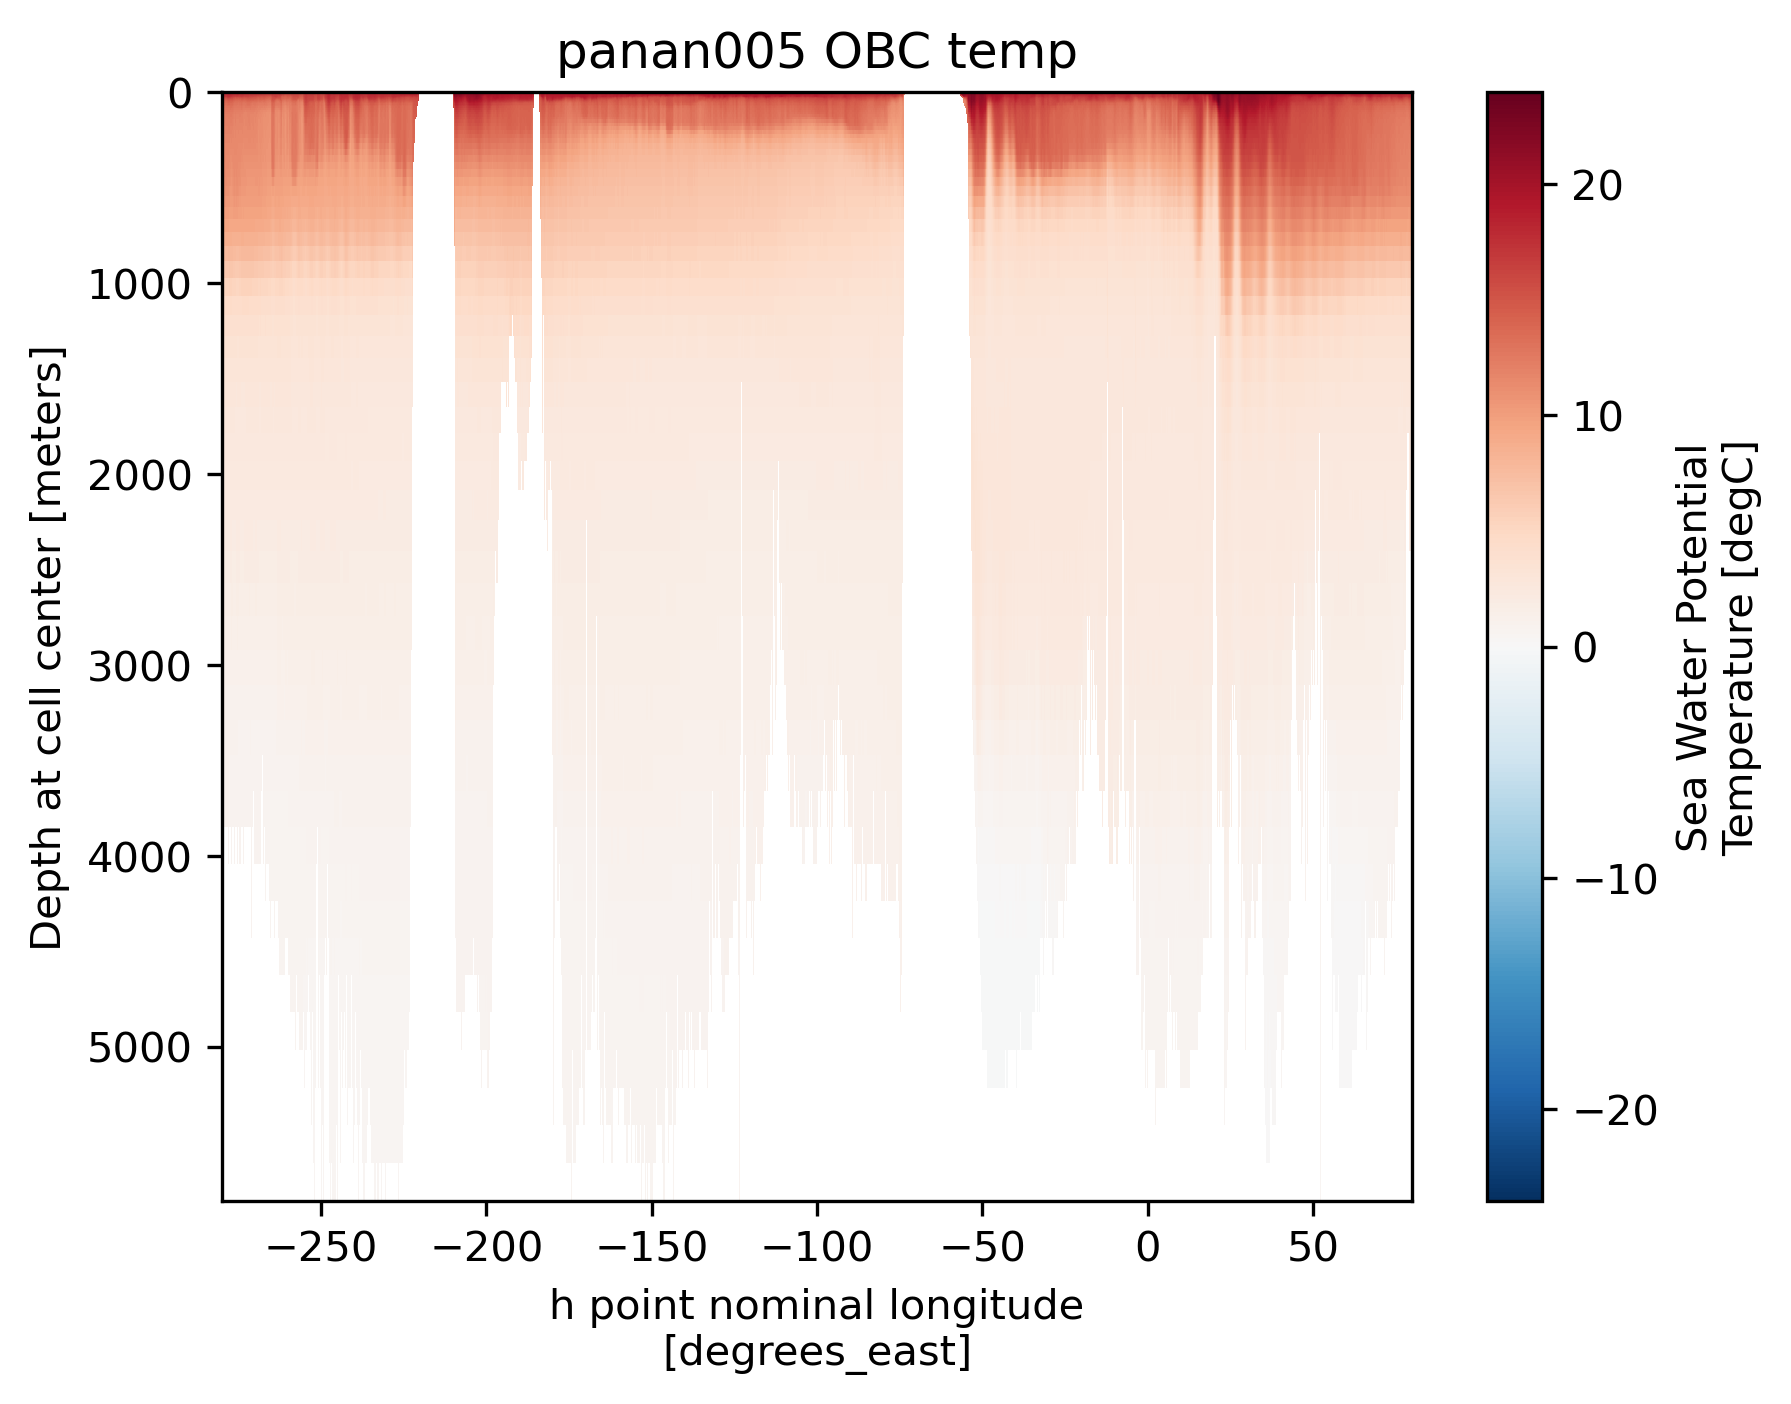

In [25]:
fig, axes = plt.subplots(dpi = 300)

panan005.thetao.isel(time = 0, yh = -1).plot(yincrease = False)
plt.title('panan005 OBC temp')

Text(0.5, 1.0, 'panan005 northern boundary u')

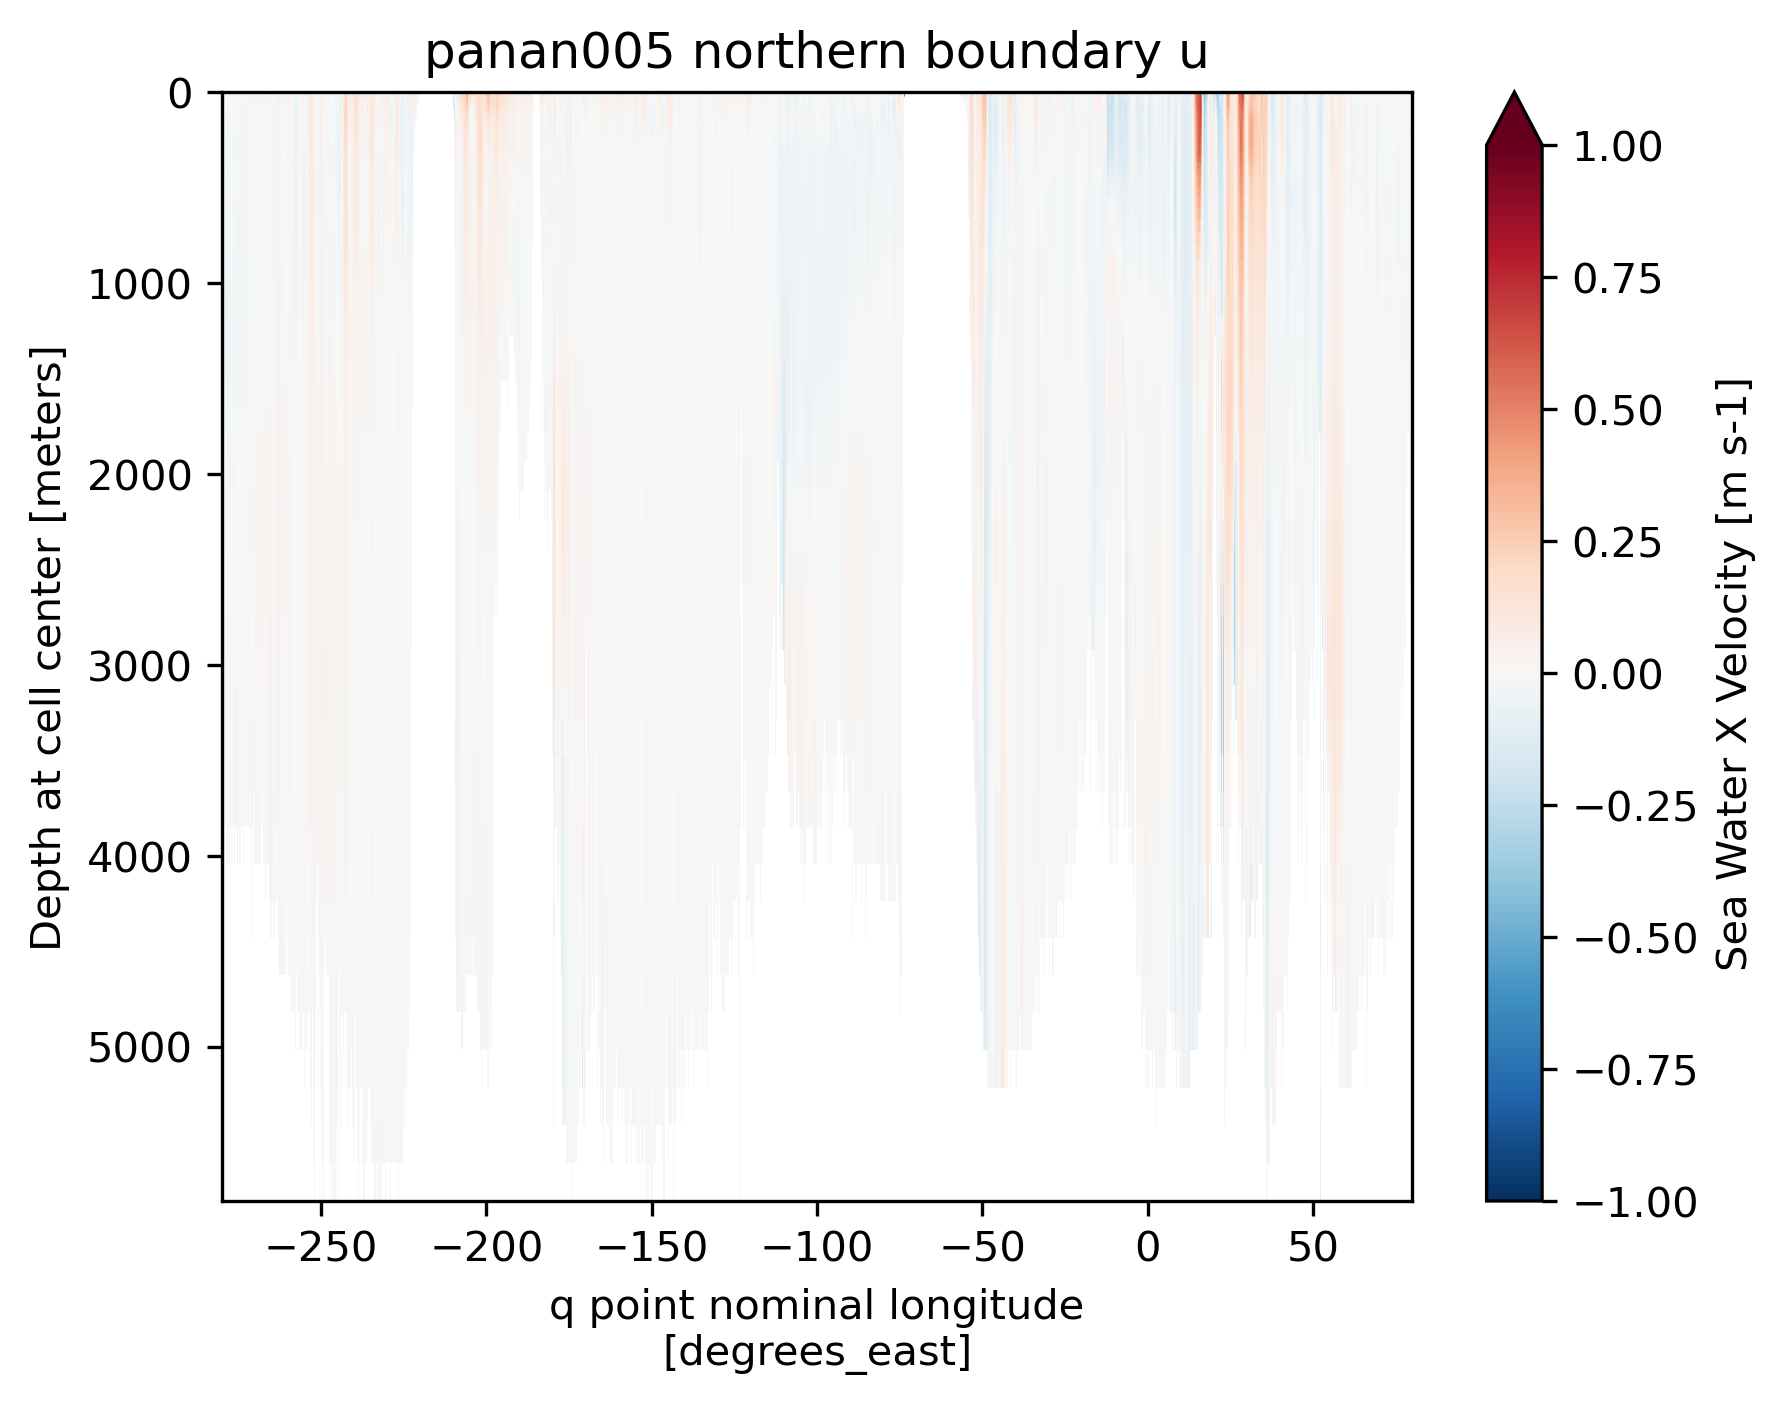

In [23]:
fig, axes = plt.subplots(dpi = 300)

panan005.uo.isel(time = 0, yh = -1).plot(yincrease = False, vmax = 1, vmin = -1, cmap = 'RdBu_r')
plt.title('panan005 northern boundary u')

# check new run and new diags

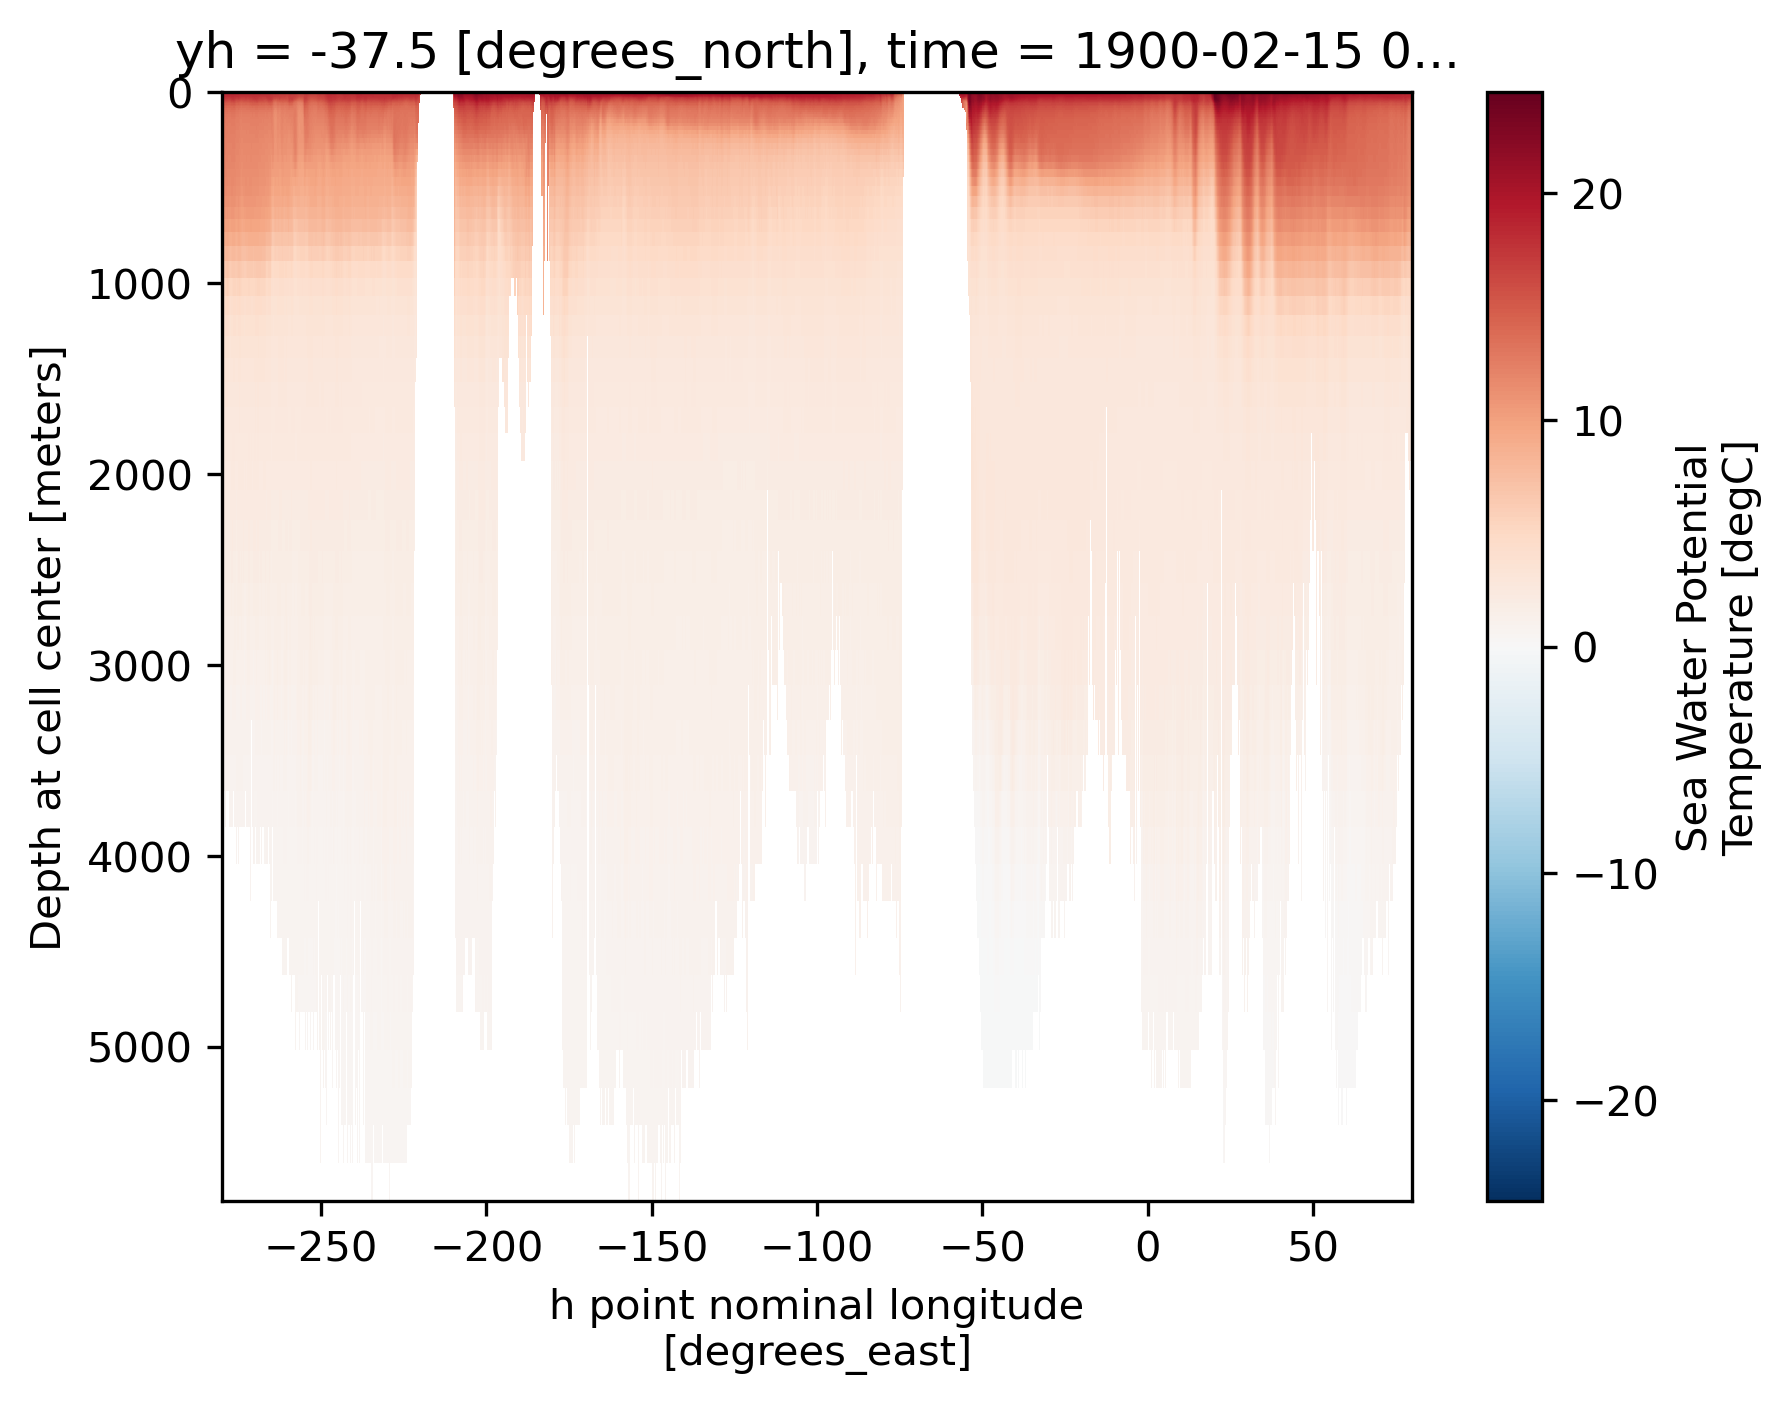

In [19]:
work_dir = '/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output001/'
#sst_daily = xr.open_mfdataset(work_dir+'access-om3.mom6.2d.tos.1day.mean._1900.nc')
ocean_month_z = xr.open_mfdataset(work_dir+'ocean_month_z.nc',
#                                  chunks = {'xh':800,'yh':1440,'time':1,'z_l':1},
                                  parallel=True)
fig, axes = plt.subplots(dpi = 300)
ocean_month_z.thetao.isel(time=0, yh = -1).plot(yincrease = False)

In [4]:
work_dir = '/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output000/'
#sst_daily = xr.open_mfdataset(work_dir+'access-om3.mom6.2d.tos.1day.mean._1900.nc')
ocean_month_z = xr.open_mfdataset(work_dir+'ocean_month_z.nc',
#                                  chunks = {'xh':800,'yh':1440,'time':1,'z_l':1},
                                  parallel=True)
#salt = xr.open_mfdataset(work_dir+'access-om3.mom6.3d.so.1mon.mean._1900.nc')
ocean_month_rho2 = xr.open_mfdataset(work_dir+'access-om3.mom6.ocean_month_rho2.nc')
speed = xr.open_mfdataset(work_dir+'access-om3.mom6.2d.speed.1mon.mean.1900.nc',
                         #chunks = {'xh':100,'yh':100,'time':1},
                          parallel=True)
ice = xr.open_mfdataset(work_dir+'access-om3.cice.1mon.mean.1900-01.nc',parallel=True)

In [5]:
ocean_month_z

<xarray.Dataset> Size: 15GB
Dimensions:     (xh: 4320, yh: 1442, z_l: 75, z_i: 76, time: 1, nv: 2,
                 xq: 4321, yq: 1443)
Coordinates:
  * xh          (xh) float64 35kB -280.0 -279.9 -279.8 ... 79.79 79.88 79.96
  * yh          (yh) float64 12kB -86.49 -86.47 -86.45 ... -37.63 -37.56 -37.5
  * z_l         (z_l) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * z_i         (z_i) float64 608B 0.0 1.083 2.279 ... 5.61e+03 5.809e+03
  * time        (time) object 8B 1900-01-16 12:00:00
  * nv          (nv) float64 16B 1.0 2.0
  * xq          (xq) float64 35kB -280.0 -279.9 -279.8 ... 79.83 79.92 80.0
  * yq          (yq) float64 12kB -86.5 -86.48 -86.46 ... -37.59 -37.53 -37.46
Data variables:
    volcello    (time, z_l, yh, xh) float32 2GB dask.array<chunksize=(1, 15, 289, 864), meta=np.ndarray>
    uo          (time, z_l, yh, xq) float32 2GB dask.array<chunksize=(1, 15, 289, 865), meta=np.ndarray>
    vo          (time, z_l, yq, xh) float32 2GB dask.array<chunksize=(1, 15, 289, 864), meta=np.ndarray>
    thetao      (time, z_l, yh, xh) float32 2GB dask.array<chunksize=(1, 15, 289, 864), meta=np.ndarray>
    so          (time, z_l, yh, xh) float32 2GB dask.array<chunksize=(1, 15, 289, 864), meta=np.ndarray>
    rhopot2     (time, z_l, yh, xh) float32 2GB dask.array<chunksize=(1, 15, 289, 864), meta=np.ndarray>
    rhopot0     (time, z_l, yh, xh) float32 2GB dask.array<chunksize=(1, 15, 289, 864), meta=np.ndarray>
    agessc      (time, z_l, yh, xh) float32 2GB dask.array<chunksize=(1, 15, 289, 864), meta=np.ndarray>
    average_T1  (time) datetime64[ns] 8B dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] 8B dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] 8B dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds   (time, nv) object 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    NumFilesInSet:     1
    title:             ACCESS-OM3
    associated_files:  areacello: access-om3.mom6.static.nc
    grid_type:         regular
    grid_tile:         N/A

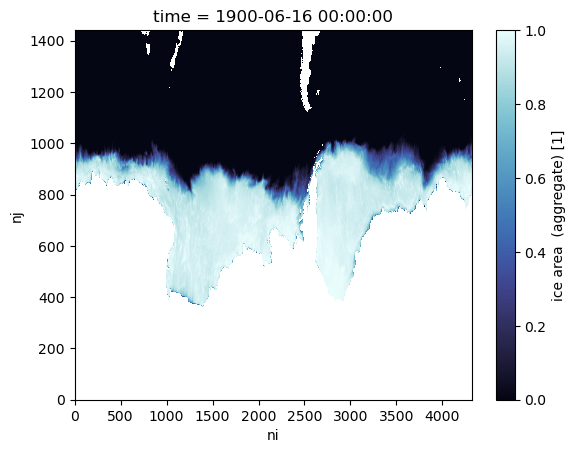

In [4]:
ice.aice_m.plot(cmap = cm.cm.ice)

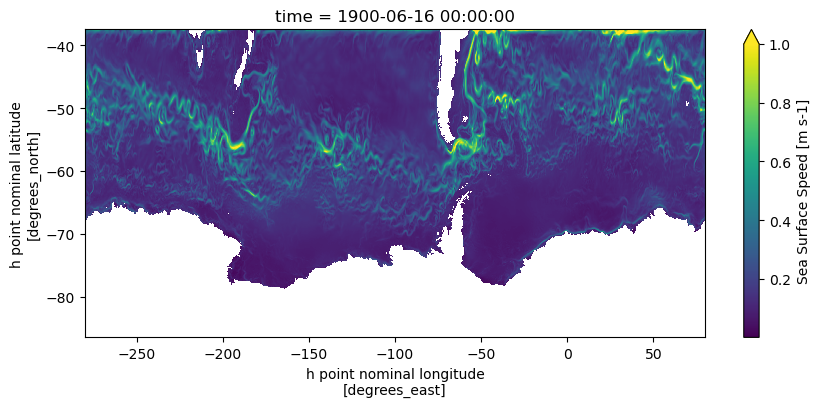

In [17]:
fig = plt.figure(figsize = (10,4))
s = speed.speed.isel(time = -1).load()
s.plot(vmax = 1)

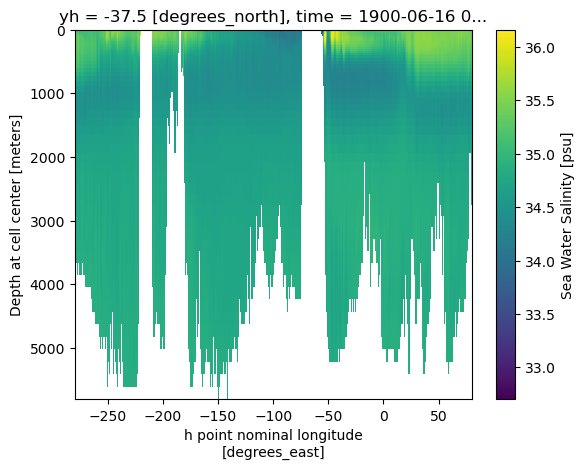

In [6]:
ocean_month_z.so.isel(yh = -1).plot(yincrease = False)

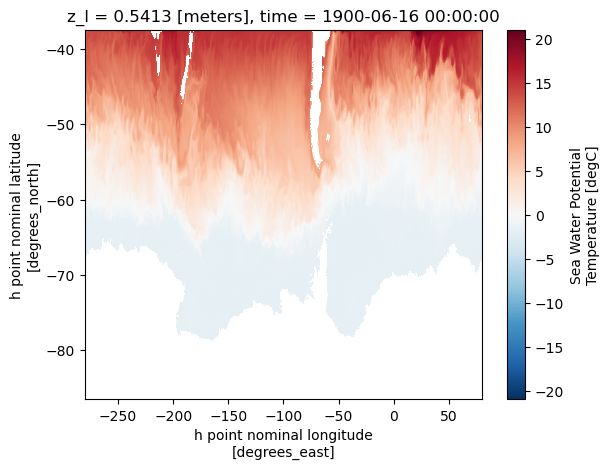

In [7]:
ocean_month_z.thetao.isel(z_l = 0,time = 0).plot()

In [8]:
ocean_month_z.thetao.min().values

array(-2.1105783, dtype=float32)

In [9]:
ocean_month_z.thetao.max().values

array(21.070719, dtype=float32)

In [10]:
ocean_month_z.so.max().values

array(36.595768, dtype=float32)

In [11]:
ocean_month_z.so.min().values

array(1.9491744, dtype=float32)

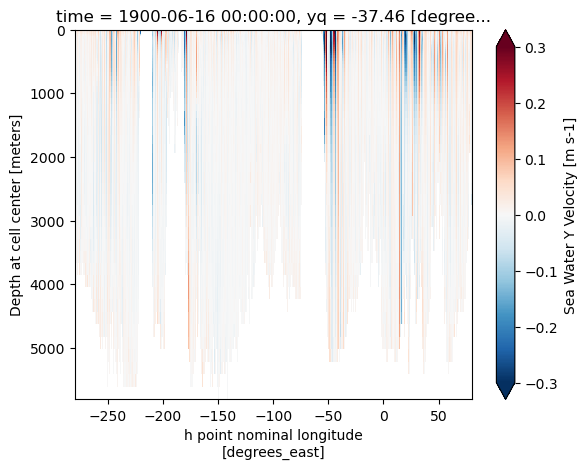

In [12]:
ocean_month_z.vo.isel(yq = -1).plot(yincrease = False, vmax = 0.3, vmin = -0.3, cmap = 'RdBu_r')

Text(0.5, 1.0, 'panan u velocity at northern boundary, t = 1 month')

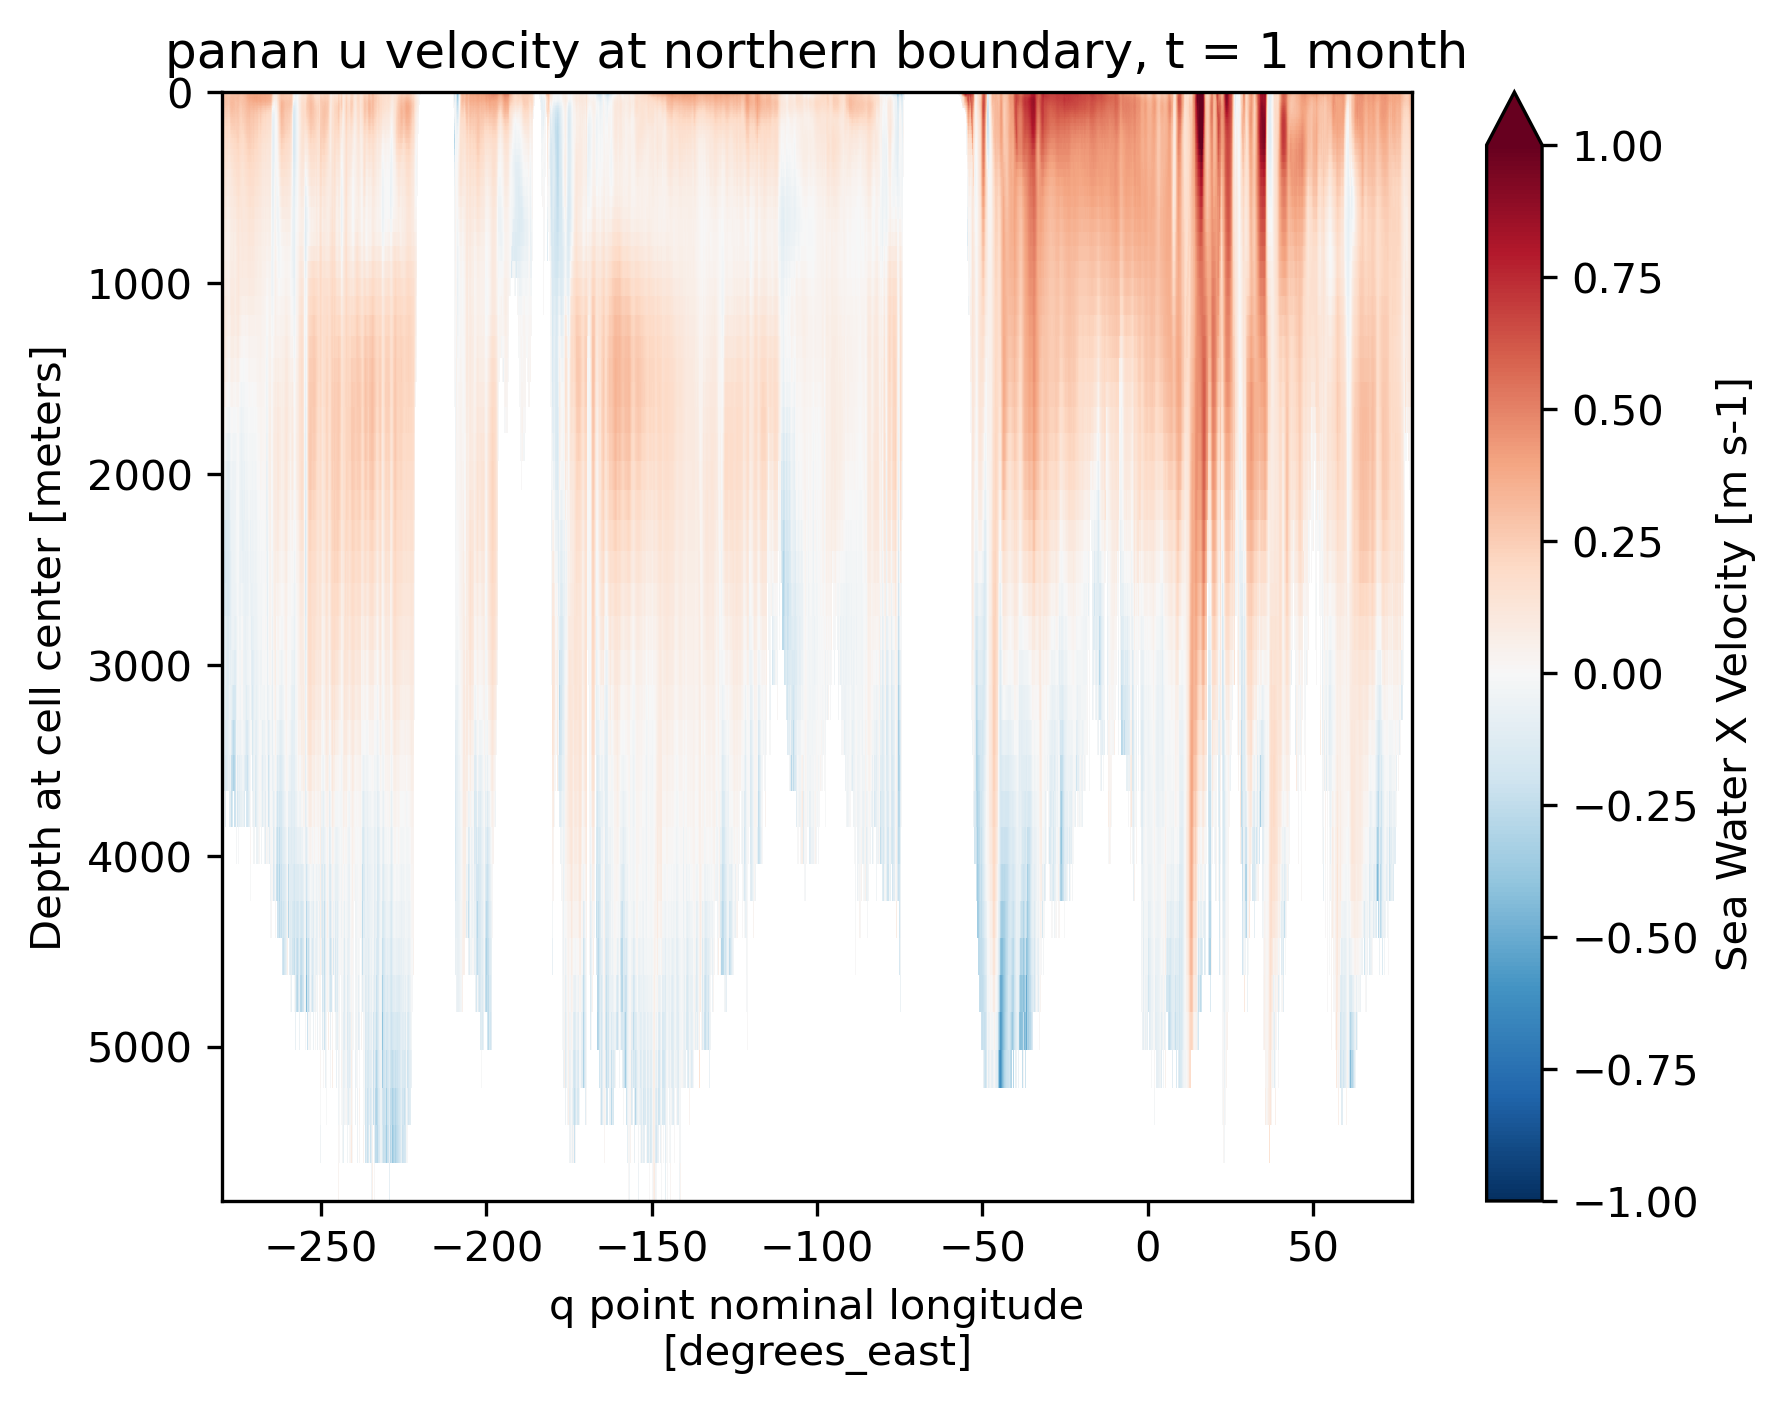

In [6]:
fig, axes = plt.subplots(dpi = 300)
ocean_month_z.uo.isel(yh = -1).plot(yincrease = False, vmax = 1, vmin = -1, cmap = 'RdBu_r')
plt.title('panan u velocity at northern boundary, t = 1 month')

Text(0.5, 1.0, 'panan u velocity at northern boundary, t=6 months')

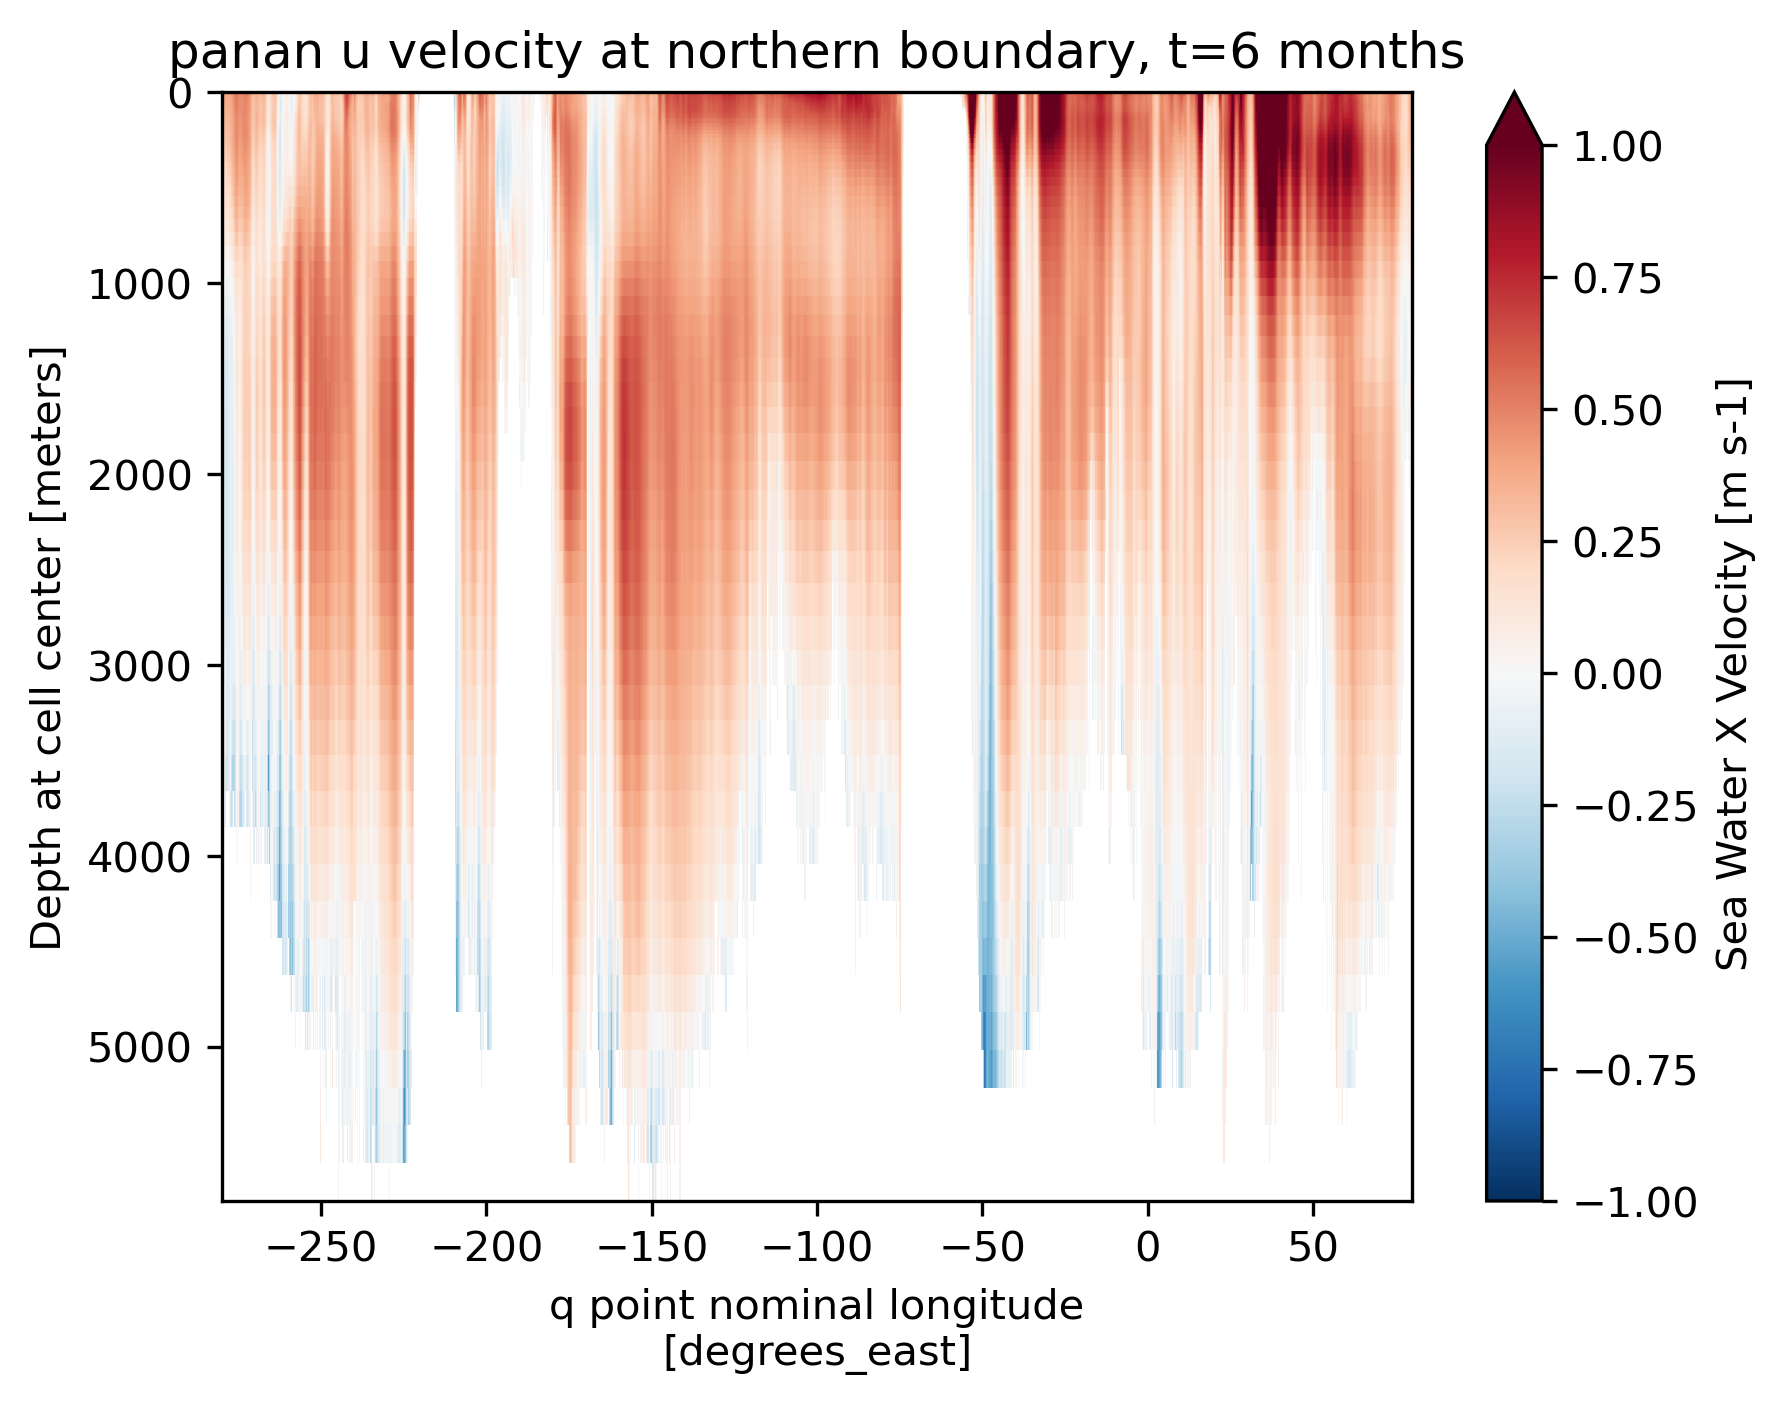

In [9]:
work_dir6 = '/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output006/'
#sst_daily = xr.open_mfdataset(work_dir+'access-om3.mom6.2d.tos.1day.mean._1900.nc')
ocean_month_z6 = xr.open_mfdataset(work_dir6+'ocean_month_z.nc',
#                                  chunks = {'xh':800,'yh':1440,'time':1,'z_l':1},
                                  parallel=True)
fig, axes = plt.subplots(dpi = 300)
ocean_month_z6.uo.isel(yh = -1).plot(yincrease = False, vmax = 1, vmin = -1, cmap = 'RdBu_r')
plt.title('panan u velocity at northern boundary, t=6 months')

OBC looks good

In [13]:
umo = xr.open_mfdataset(work_dir+'access-om3.mom6.2d.umo_2d.1mon.mean.1900.nc')
umo2 = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output001/access-om3.mom6.2d.umo_2d.1mon.mean.1900.nc')
umo3 = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output002/access-om3.mom6.2d.umo_2d.1mon.mean.1900.nc')
umo6 = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output005/access-om3.mom6.2d.umo_2d.1mon.mean.1900.nc')
umo


<xarray.Dataset> Size: 25MB
Dimensions:     (xq: 4321, yh: 1442, time: 1, nv: 2)
Coordinates:
  * xq          (xq) float64 35kB -280.0 -279.9 -279.8 ... 79.83 79.92 80.0
  * yh          (yh) float64 12kB -86.49 -86.47 -86.45 ... -37.63 -37.56 -37.5
  * time        (time) object 8B 1900-06-16 00:00:00
  * nv          (nv) float64 16B 1.0 2.0
Data variables:
    umo_2d      (time, yh, xq) float32 25MB dask.array<chunksize=(1, 721, 2161), meta=np.ndarray>
    average_T1  (time) datetime64[ns] 8B dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] 8B dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] 8B dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds   (time, nv) object 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1
    title:          ACCESS-OM3
    grid_type:      regular
    grid_tile:      N/A

[209.55066]
[217.87234]
[214.09544]
[209.55066]


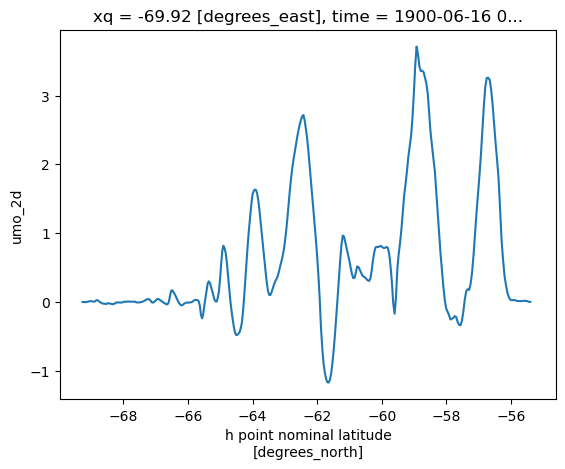

In [14]:
#drake passage transport
rho = 1035
(umo.umo_2d.sel(xq = -69.9, method = 'nearest')/1035/1e6).plot()#.sum('yh').values
#vol transport through drake passage = umo (kg/s) /rho_0

print((umo.umo_2d.sel(xq = -69.9, method = 'nearest')/1035/1e6).sum('yh').values)
print((umo2.umo_2d.sel(xq = -69.9, method = 'nearest')/1035/1e6).sum('yh').values)
print((umo3.umo_2d.sel(xq = -69.9, method = 'nearest')/1035/1e6).sum('yh').values)
print((umo6.umo_2d.sel(xq = -69.9, method = 'nearest')/1035/1e6).sum('yh').values)

In [15]:
ocean_month_rho2 = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output005/access-om3.mom6.ocean_month_rho2.nc')

rho0 = 1035
Psi =(ocean_month_rho2.vmo.sum('xh')/rho0).cumsum('rho2_l') -  (ocean_month_rho2.vmo.sum('xh')/rho0).sum('rho2_l')
Psi = Psi.load()

(1037.5, 1032.0)

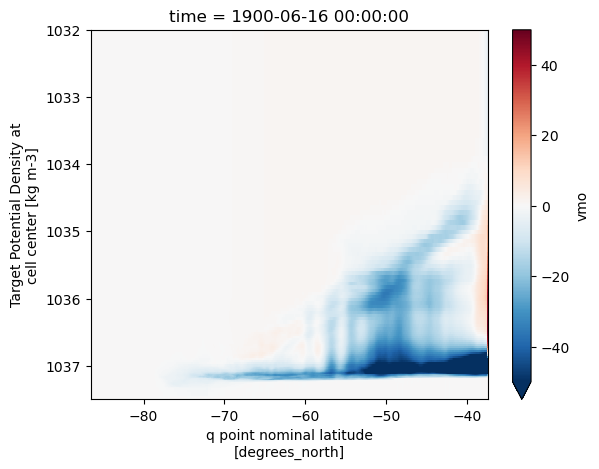

In [16]:
(Psi/1e6).plot(y = 'rho2_l', yincrease = False, vmax = 50, vmin = -50, cmap = 'RdBu_r')
plt.ylim(1037.5,1032)

(1037.5, 1032.0)

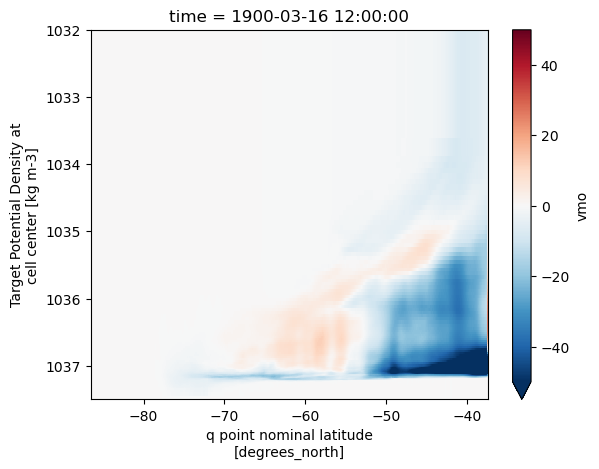

In [2]:
ocean_month_rho3 = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output002/access-om3.mom6.ocean_month_rho2.nc')

rho0 = 1035
Psi =(ocean_month_rho3.vmo.sum('xh')/rho0).cumsum('rho2_l') -  (ocean_month_rho3.vmo.sum('xh')/rho0).sum('rho2_l')
Psi = Psi.load()
(Psi/1e6).plot(y = 'rho2_l', yincrease = False, vmax = 50, vmin = -50, cmap = 'RdBu_r')
plt.ylim(1037.5,1032)

In [32]:
panan005#.umo_2d.sel(xq = -69.9, method = 'nearest')/1035/1e6).sum('yh').values

<xarray.Dataset> Size: 29GB
Dimensions:     (xh: 7200, yh: 1690, z_l: 75, z_i: 76, time: 1, nv: 2,
                 xq: 7201, yq: 1691)
Coordinates:
  * xh          (xh) float64 58kB -280.0 -279.9 -279.9 ... 79.87 79.92 79.97
  * yh          (yh) float64 14kB -81.1 -81.08 -81.06 ... -37.16 -37.12 -37.08
  * z_l         (z_l) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * z_i         (z_i) float64 608B 0.0 1.083 2.279 ... 5.61e+03 5.809e+03
  * time        (time) object 8B 1991-01-16 12:00:00
  * nv          (nv) float64 16B 1.0 2.0
  * xq          (xq) float64 58kB -280.0 -279.9 -279.9 ... 79.9 79.95 80.0
  * yq          (yq) float64 14kB -81.11 -81.09 -81.07 ... -37.14 -37.1 -37.06
Data variables:
    volcello    (time, z_l, yh, xh) float32 4GB dask.array<chunksize=(1, 38, 94, 100), meta=np.ndarray>
    uo          (time, z_l, yh, xq) float32 4GB dask.array<chunksize=(1, 38, 94, 101), meta=np.ndarray>
    vo          (time, z_l, yq, xh) float32 4GB dask.array<chunksize=(1, 38, 95, 100), meta=np.ndarray>
    thetao      (time, z_l, yh, xh) float32 4GB dask.array<chunksize=(1, 38, 94, 100), meta=np.ndarray>
    so          (time, z_l, yh, xh) float32 4GB dask.array<chunksize=(1, 38, 94, 100), meta=np.ndarray>
    rhopot2     (time, z_l, yh, xh) float32 4GB dask.array<chunksize=(1, 38, 94, 100), meta=np.ndarray>
    rhopot0     (time, z_l, yh, xh) float32 4GB dask.array<chunksize=(1, 38, 94, 100), meta=np.ndarray>
    agessc      (time, z_l, yh, xh) float32 4GB dask.array<chunksize=(1, 38, 94, 100), meta=np.ndarray>
    average_T1  (time) datetime64[ns] 8B dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] 8B dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT  (time) timedelta64[ns] 8B dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds   (time, nv) timedelta64[ns] 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    title:             panan
    associated_files:  areacello: 19910101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    history:           20241216T0524Z: /scratch/x77/ahg157/software/mppnccomb...

In [21]:
ocean_geometry = xr.open_mfdataset(work_dir+'ocean_geometry.nc')

In [22]:
ocean_geometry

<xarray.Dataset> Size: 947MB
Dimensions:  (lath: 1442, lonh: 4320, latq: 1443, lonq: 4321)
Coordinates:
  * lath     (lath) float64 12kB -86.49 -86.47 -86.45 ... -37.63 -37.56 -37.5
  * lonh     (lonh) float64 35kB -280.0 -279.9 -279.8 ... 79.79 79.88 79.96
  * latq     (latq) float64 12kB -86.5 -86.48 -86.46 ... -37.59 -37.53 -37.46
  * lonq     (lonq) float64 35kB -280.0 -279.9 -279.8 ... 79.83 79.92 80.0
Data variables: (12/19)
    geolatb  (latq, lonq) float64 50MB dask.array<chunksize=(722, 2161), meta=np.ndarray>
    geolonb  (latq, lonq) float64 50MB dask.array<chunksize=(722, 2161), meta=np.ndarray>
    geolat   (lath, lonh) float64 50MB dask.array<chunksize=(721, 2160), meta=np.ndarray>
    geolon   (lath, lonh) float64 50MB dask.array<chunksize=(721, 2160), meta=np.ndarray>
    D        (lath, lonh) float64 50MB dask.array<chunksize=(721, 2160), meta=np.ndarray>
    f        (latq, lonq) float64 50MB dask.array<chunksize=(722, 2161), meta=np.ndarray>
    ...       ...
    dyBu     (latq, lonq) float64 50MB dask.array<chunksize=(722, 2161), meta=np.ndarray>
    Ah       (lath, lonh) float64 50MB dask.array<chunksize=(721, 2160), meta=np.ndarray>
    Aq       (latq, lonq) float64 50MB dask.array<chunksize=(722, 2161), meta=np.ndarray>
    dxCvo    (latq, lonh) float64 50MB dask.array<chunksize=(722, 2160), meta=np.ndarray>
    dyCuo    (lath, lonq) float64 50MB dask.array<chunksize=(721, 2161), meta=np.ndarray>
    wet      (lath, lonh) float64 50MB dask.array<chunksize=(721, 2160), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1

In [55]:
13*12 #kSU/month*months 

156

In [57]:
13*12 * 6

936

In [10]:
uo = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/25km_jra_ryf-obc/output000/access-om3.mom6.3d.uo.1mon.mean.1900.nc')

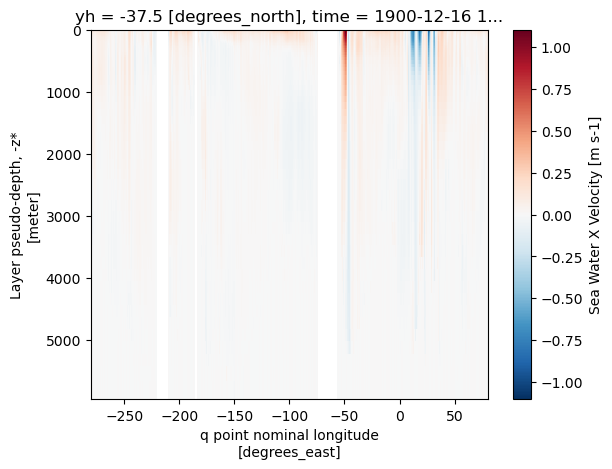

In [14]:
uo.uo.isel(time = -1, yh = -1).plot(yincrease = False)

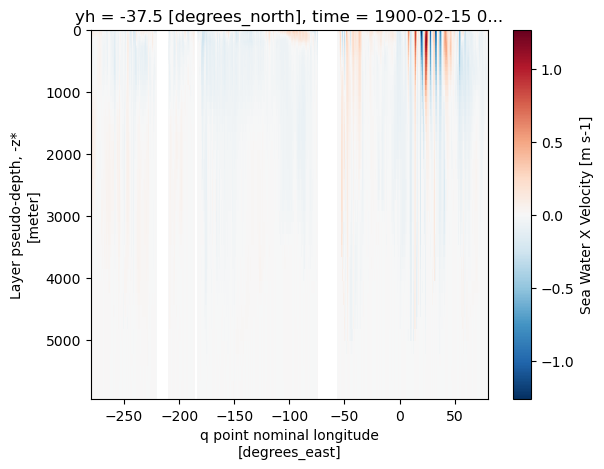

In [20]:
uo = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/work/8km_jra_ryf_obc2-sapphirerapid-Charrassin2/access-om3.mom6.3d.uo.1mon.mean._1900.nc')
uo.uo.isel(time = -1, yh = -1).plot(yincrease = False)

In [29]:
wfo_old = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/work/8km_jra_ryf_obc2-sapphirerapid-Charrassin2/access-om3.mom6.2d.wfo.1mon.mean._1900.nc')
wfo_new = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output000/access-om3.mom6.2d.wfo.1mon.mean.1900.nc')


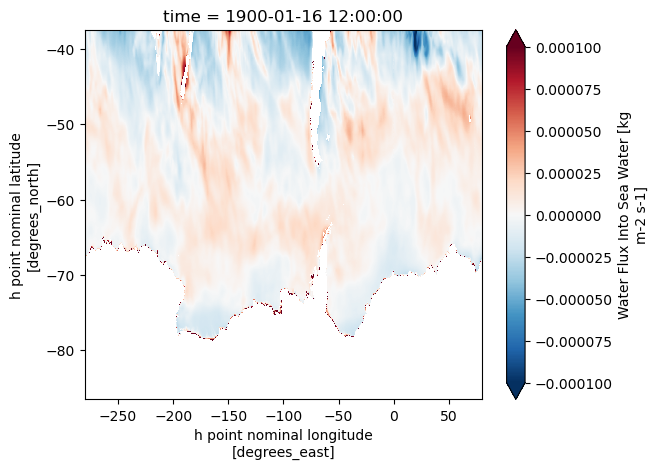

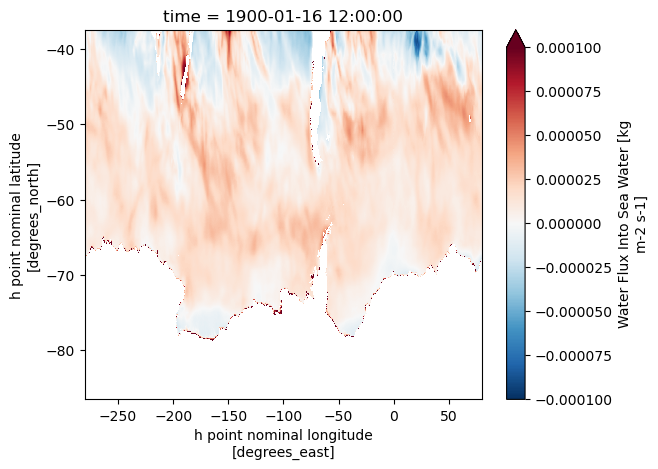

In [33]:
wfo_old.wfo.isel(time = 0).plot(vmax = 1e-4, vmin = -1e-4, cmap = 'RdBu_r')
plt.show()
wfo_new.wfo.isel(time = 0).plot(vmax = 1e-4, vmin = -1e-4, cmap = 'RdBu_r')
plt.show()


In [7]:
SSH_old = xr.open_dataset('/scratch/x77/cy8964/access-om3/work/8km_jra_ryf_obc2-sapphirerapid-Charrassin2/access-om3.mom6.2d.SSH.1mon.mean._1900.nc') 
SSH_new =  xr.open_dataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output005/access-om3.mom6.2d.SSH.1mon.mean.1900.nc')


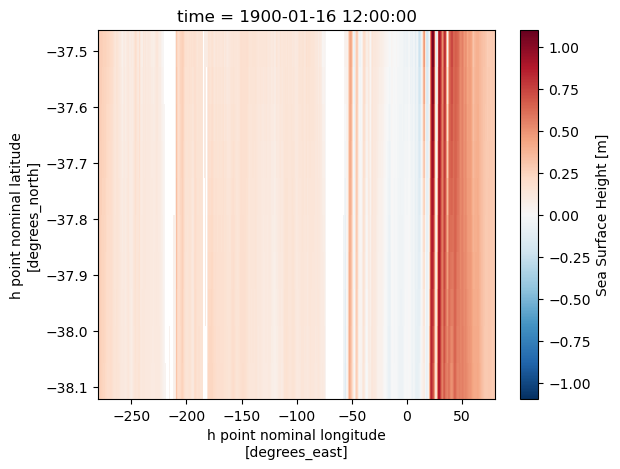

In [5]:
SSH_old.SSH.isel(time = 0, yh = np.arange(-10,0)).plot()

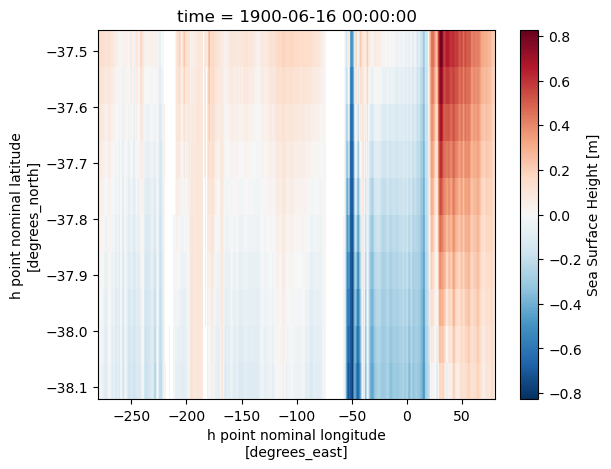

In [8]:
SSH_new.SSH.isel(time = 0, yh = np.arange(-10,0)).plot()

In [16]:
rhopot2_old = xr.open_dataset('/scratch/x77/cy8964/access-om3/work/8km_jra_ryf_obc2-sapphirerapid-Charrassin2/access-om3.mom6.3d.rhopot2.1mon.mean._1900.nc') 
rhopot2_new =  xr.open_dataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output000/access-om3.mom6.3d.rhopot2.1mon.mean.1900.nc')


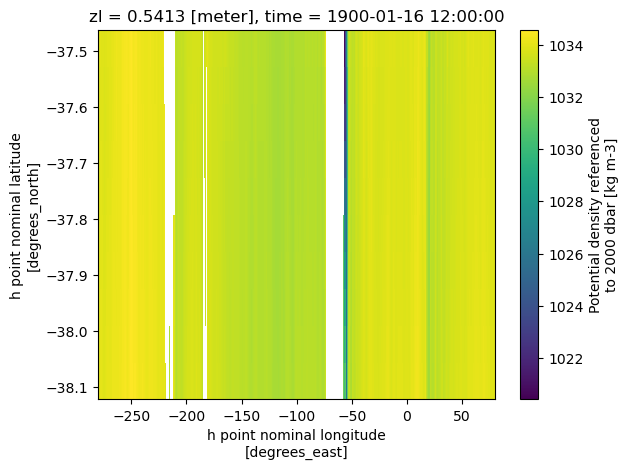

In [17]:
rhopot2_old.isel(time = 0, yh = np.arange(-10,0), zl= 0).rhopot2.plot()

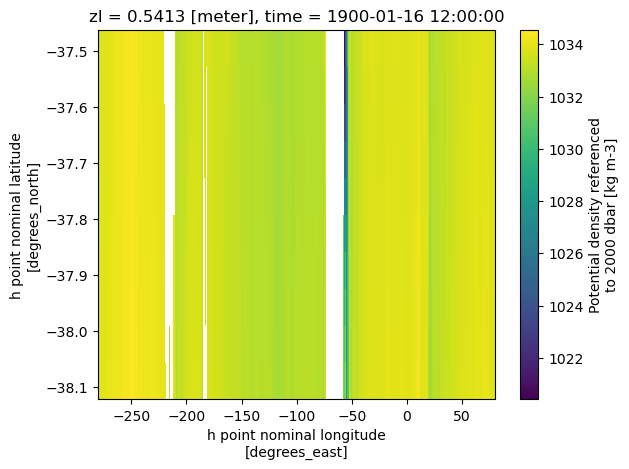

In [18]:
rhopot2_new.isel(time = 0, yh = np.arange(-10,0), zl= 0).rhopot2.plot()

In [19]:
!diff /scratch/x77/cy8964/access-om3/work/8km_jra_ryf_obc2-sapphirerapid-Charrassin2/MOM_parameter_doc.all /scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun/output000/MOM_parameter_doc.all


71c71
< DT = 360.0                      !   [s]
---
> DT = 600.0                      !   [s]
75c75
< DT_THERM = 3600.0               !   [s] default = 360.0
---
> DT_THERM = 1200.0               !   [s] default = 600.0
101c101
< DTBT_RESET_PERIOD = 0.0         !   [s] default = 3600.0
---
> DTBT_RESET_PERIOD = 1800.0      !   [s] default = 1200.0
126c126
< USE_PSURF_IN_EOS = True         !   [Boolean] default = True
---
> USE_PSURF_IN_EOS = False        !   [Boolean] default = True
142c142
< CHECK_BAD_SURFACE_VALS = True   !   [Boolean] default = False
---
> CHECK_BAD_SURFACE_VALS = False  !   [Boolean] default = False
144,158d143
< BAD_VAL_SSH_MAX = 50.0          !   [m] default = 20.0
<                                 ! The value of SSH above which a bad value message is triggered, if
<                                 ! CHECK_BAD_SURFACE_VALS is true.
< BAD_VAL_SSS_MAX = 75.0          !   [PPT] default = 45.0
<                                 ! The value of SSS above which a bad val

In [2]:
# Try with Wright eqn of state
oceanWright = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun-Wright/output000/ocean_month_z.nc', parallel = True)
speedWright = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun-Wright/output000/access-om3.mom6.2d.speed.1day.mean.1900.nc', parallel = True)
oceanWright1 = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun-Wright/output001/ocean_month_z.nc', parallel = True)
speedWright1 = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun-Wright/output001/access-om3.mom6.2d.speed.1day.mean.1900.nc', parallel = True)
#and without salt restoring flux zero False
oceanadjustfw = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/work/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun-adjustfw/ocean_month_z.nc', parallel = True)
speedadjustfw = xr.open_mfdataset('/scratch/x77/cy8964/access-om3/work/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun-adjustfw/access-om3.mom6.2d.speed.1day.mean._1900.nc', parallel = True)



In [ ]:
fig, axes = plt.subplots(dpi = 300)
oceanWright1.uo.isel(yh = -1).mean('time').plot(yincrease = False, vmax = 1, vmin = -1, cmap = 'RdBu_r')
plt.title('panan u velocity at northern boundary, t=1 months, EOS = Wright_reduced')
plt.show()


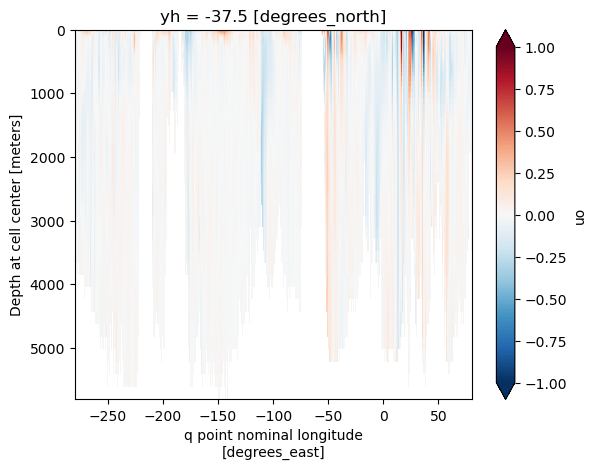

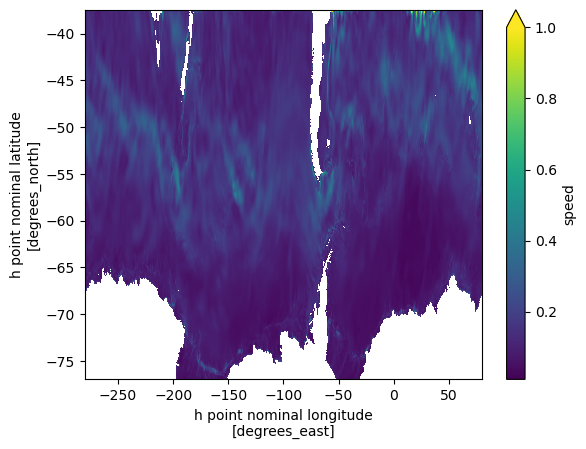

In [20]:
oceanWright.uo.isel(yh = -1).mean('time').plot(yincrease = False, vmax = 1, vmin = -1, cmap = 'RdBu_r')
plt.show()
speedWright.speed.isel(yh = np.arange(-1000,0)).mean('time').plot(vmax = 1)

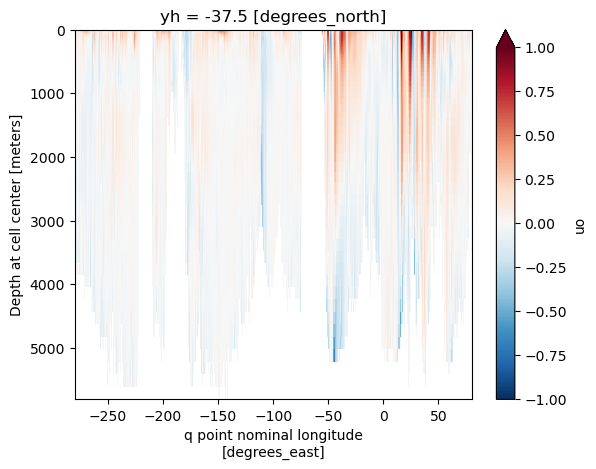

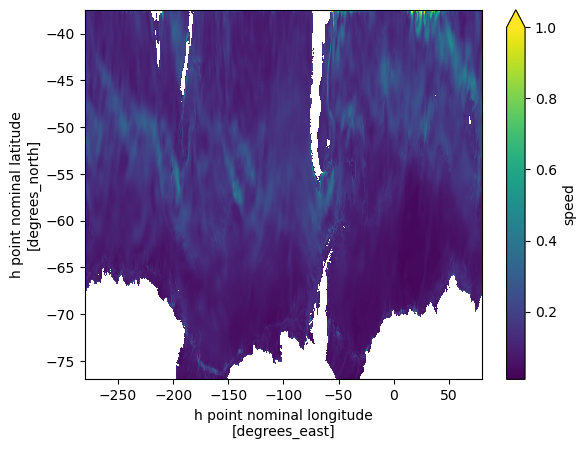

In [21]:
oceanadjustfw.uo.isel(yh = -1).mean('time').plot(yincrease = False, vmax = 1, vmin = -1, cmap = 'RdBu_r')
plt.show()
speedadjustfw.speed.isel(yh = np.arange(-1000,0)).mean('time').plot(vmax = 1)